In [31]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

from venn import venn
from scipy import stats
from collections import Counter
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

IMREP_df = pd.read_csv("../summary_data/complete_sample/IMREP_merged_extracted_features.csv")
TRUST4_df = pd.read_csv("../summary_data/complete_sample/TRUST4_merged_extracted_features.csv")
MIXCR_df = pd.read_csv("../summary_data/complete_sample/MIXCR_merged_extracted_features.csv")
TCR_df = pd.read_csv("../summary_data/complete_sample/TCR_merged_extracted_features.csv")


# Rename TCR SAMPLE names based on 1:1 matchup in python dictionary:
Sample_name_matchup_RNA_TCR_dict = {
    "ESO1-sorted-T-cells_S13_L007" : "RearrangementDetails_ESO1_sorted_infusion",
    "INY1-sorted-T-cells_S14_L007" : "RearrangementDetails_INY1_sorted_infusion",
    "INY2-sorted-T-cells_S15_L007" : "RearrangementDetails_INY2_sorted_infusion",
    "TR2-PBMC_S12" : "RearrangementDetails_TR-PBMC",
    "SAR-11-14-12RNA_S1" : "SAR_11-14_PBMC",
    "MP-11-28-12RNA_S2" : "MP_11-28_PBMC",
    "CMT-baseline1C_CAGATC" : "Pt204_Baseline_TCR_seq",
    "HM-baseline1C_CGATGT" : "Pt310_baseline_TCRseq",
    "PT0310_S9" : "Pt310_on-tx_TCR_seq",
    "LEK-baseline_CGATGT" : "Pt294_baseline_TCR_seq",
    "LEK-OT110712A_CCGTCC" : "Pt294_on-tx_TCR_seq",
    "JSSBaseline-RNA_GTGAAA" : "Pt_308_baseline_TCR_seq",
    "RAS-baseline_TGACCA" : "Pt_325_baseline_TCR_seq",
    "PT0112-B_S3" : "Pt_112_baseline_TCR_seq",
    "PT0285-B_S5" : "Pt_285_baseline_TCR_seq"
}


for matchup in Sample_name_matchup_RNA_TCR_dict:
#     print(matchup)
#     print(Sample_name_matchup_RNA_TCR_dict[matchup])
    TCR_df.loc[(TCR_df['Sample'] == Sample_name_matchup_RNA_TCR_dict[matchup]), 'Sample' ] = matchup
# TCR_df.loc[TCR_df['Sample'] == "PT0285-B_S5"].head()




# Select Rows with nReads greater than 1
IMREP_df = IMREP_df[IMREP_df['nReads'] > 1]
TRUST4_df = TRUST4_df[TRUST4_df['nReads'] > 1]
MIXCR_df = MIXCR_df[MIXCR_df['nReads'] > 1]
TCR_df = TCR_df[TCR_df['nReads'] > 1]



# # Create column total_reads_in_sample

sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
               'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
               'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
               'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
               'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
               'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

IMREP_df["total_reads_in_sample"] = 0
TRUST4_df["total_reads_in_sample"] = 0
MIXCR_df["total_reads_in_sample"] = 0
TCR_df["total_reads_in_sample"] = 0

# print(IMREP_df.loc[IMREP_df['Sample'] == "CMT-baseline1C_CAGATC"]['nReads'].sum())

for sample in sample_names:
    total_imrep_sample_reads = IMREP_df.loc[IMREP_df['Sample'] == sample]['nReads'].sum()
    IMREP_df.loc[IMREP_df['Sample'] == sample, 'total_reads_in_sample'] = total_imrep_sample_reads

    total_TRUST4_sample_reads = TRUST4_df.loc[TRUST4_df['Sample'] == sample]['nReads'].sum()
    TRUST4_df.loc[TRUST4_df['Sample'] == sample, 'total_reads_in_sample'] = total_TRUST4_sample_reads

    total_MIXCR_sample_reads = MIXCR_df.loc[MIXCR_df['Sample'] == sample]['nReads'].sum()
    MIXCR_df.loc[MIXCR_df['Sample'] == sample, 'total_reads_in_sample'] = total_MIXCR_sample_reads
    
    total_TCR_sample_reads = TCR_df.loc[TCR_df['Sample'] == sample]['nReads'].sum()
    TCR_df.loc[TCR_df['Sample'] == sample, 'total_reads_in_sample'] = total_TCR_sample_reads


# Calculate frequency of CDR3 sequence with respect to CDR3s that occur more than once.
IMREP_df["Frequency"] = IMREP_df['nReads'] / (IMREP_df['total_reads_in_sample'] * 1.0)
TRUST4_df["Frequency"] = TRUST4_df['nReads'] / (TRUST4_df['total_reads_in_sample'] * 1.0)
MIXCR_df["Frequency"] = MIXCR_df['nReads'] / (MIXCR_df['total_reads_in_sample'] * 1.0)
TCR_df["Frequency"] = TCR_df['nReads'] / (TCR_df['total_reads_in_sample'] * 1.0)  


# rename nReads and frequencies columns according to tool for proper merging.
IMREP_df = IMREP_df.rename(columns={"nReads": "nReads_IMREP", "Frequency": "Frequency_IMREP"})
TRUST4_df = TRUST4_df.rename(columns={"nReads": "nReads_TRUST4", "Frequency": "Frequency_TRUST4"})
MIXCR_df = MIXCR_df.rename(columns={"nReads": "nReads_MIXCR", "Frequency": "Frequency_MIXCR"})
TCR_df = TCR_df.rename(columns={"nReads": "nReads_TCR", "Frequency": "Frequency_TCR"})

# IMREP_TRUST4_MIXCR_sample_names = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
#                                    'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
#                                    'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
#                                    'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
#                                    'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
#                                    'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']


# TCR_SAMPLE_NAMES = ['MP_11-28_PBMC' , 'Pt204_Baseline_TCR_seq' , 'Pt294_baseline_TCR_seq', 
#                     'Pt294_on-tx_TCR_seq' , 'Pt310_baseline_TCRseq' , 'Pt310_on-tx_TCR_seq',
#                     'Pt_112_baseline_TCR_seq' , 'Pt_285_baseline_TCR_seq', 'Pt_308_baseline_TCR_seq',
#                     'Pt_325_baseline_TCR_seq', 'RearrangementDetails_ESO1_sorted_infusion',
#                     'RearrangementDetails_INY1_sorted_infusion', 'RearrangementDetails_INY2_sorted_infusion',
#                     'RearrangementDetails_TR-PBMC' , 'SAR_11-14_PBMC']


# print(TCR_df["Sample"].unique())

# print(MIXCR_df["Sample"].unique())


TCR_df.head()

,Sample,CDR3,nReads_TCR,total_reads_in_sample,Frequency_TCR
2,MP-11-28-12RNA_S2,CASSETGAETQYF,4,18617,0.000215
4,MP-11-28-12RNA_S2,CASSFETVNNSPLHF,2,18617,0.000107
13,MP-11-28-12RNA_S2,CAISESGGSSYNEQFF,2,18617,0.000107
17,MP-11-28-12RNA_S2,CASSVSYRGRFGYTF,4,18617,0.000215
19,MP-11-28-12RNA_S2,CASTRWGDNEQFF,2,18617,0.000107


## Complete dataframe containing clonotype frequencies across all samples and tools

In [32]:
# Merge dataframes based on two key combination: Sample and CDR3 combination. Outer join ensures no data is 
# lost for instances that do not have overlap.

merge_IMREP_TRUST4 = pd.merge(IMREP_df, TRUST4_df, how='outer', on=['Sample', 'CDR3']).fillna(0)
merge_IMREP_TRUST4_MIXCR = pd.merge(MIXCR_df, merge_IMREP_TRUST4, how='outer', on=['Sample', 'CDR3']).fillna(0)
merge_IMREP_TRUST4_MIXCR_TCR = pd.merge(TCR_df, merge_IMREP_TRUST4_MIXCR, how='outer', on=['Sample', 'CDR3']).fillna(0)

merge_IMREP_TRUST4_MIXCR_TCR.to_csv('../summary_data/complete_sample/all_tools.csv', index=False)
merge_IMREP_TRUST4_MIXCR_TCR.head()

,Sample,CDR3,nReads_TCR,total_reads_in_sample_x,Frequency_TCR,nReads_MIXCR,total_reads_in_sample_y,Frequency_MIXCR,nReads_IMREP,total_reads_in_sample_x,Frequency_IMREP,nReads_TRUST4,total_reads_in_sample_y,Frequency_TRUST4
0,MP-11-28-12RNA_S2,CASSETGAETQYF,4.0,18617.0,0.000215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MP-11-28-12RNA_S2,CASSFETVNNSPLHF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MP-11-28-12RNA_S2,CAISESGGSSYNEQFF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MP-11-28-12RNA_S2,CASSVSYRGRFGYTF,4.0,18617.0,0.000215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MP-11-28-12RNA_S2,CASTRWGDNEQFF,2.0,18617.0,0.000107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Subsampling TCR and IMREP reads

### Total reads in each sample

In [5]:
reads_count_IMREP = IMREP_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
reads_count_IMREP.reset_index()

reads_count_TCR = TCR_df[['Sample', 'total_reads_in_sample']].groupby('Sample').mean()
reads_count_TCR.reset_index()

read_count = pd.merge(reads_count_IMREP, reads_count_TCR, on = 'Sample')
read_count.columns = ['IMREP_total_reads', 'TCR_total_reads']
read_count

,IMREP_total_reads,TCR_total_reads
Sample,,
CMT-baseline1C_CAGATC,57747,906121
ESO1-sorted-T-cells_S13_L007,449177,90577
HM-baseline1C_CGATGT,28,1257571
INY1-sorted-T-cells_S14_L007,116267,87762
INY2-sorted-T-cells_S15_L007,140293,305953
JSSBaseline-RNA_GTGAAA,45265,1408590
LEK-OT110712A_CCGTCC,11845,1157845
LEK-baseline_CGATGT,17731,1769522
MP-11-28-12RNA_S2,3848,18617


In [6]:
random.seed(30)

sub_IMREP_df = pd.DataFrame({'CDR3':[], 'nReads_IMREP': [], 'total_reads_in_sample': [], 'Frequency_IMREP': []})
sub_TCR_df = pd.DataFrame({'CDR3':[], 'nReads_TCR': [], 'total_reads_in_sample': [], 'Frequency_TCR': []})

for sample in sample_names: 
    IMREP_sample_df = IMREP_df[IMREP_df['Sample'] == sample]
    TCR_sample_df = TCR_df[TCR_df['Sample'] == sample]

    if read_count.loc[sample, 'IMREP_total_reads'] > read_count.loc[sample, 'TCR_total_reads']:        
        sub_TCR_df = sub_TCR_df.append(TCR_sample_df)

        cdr3_sample_list = []
        for i in range(len(IMREP_sample_df)):
            cdr3_sample_list = cdr3_sample_list + ([IMREP_sample_df.iloc[i, 1]] * IMREP_sample_df.iloc[i, 2])
        sub_cdr3_sample_list = random.sample(cdr3_sample_list, read_count.loc[sample, 'TCR_total_reads'])
        sub_IMREP_sample_df = pd.DataFrame.from_dict(Counter(sub_cdr3_sample_list), orient='index').reset_index()
        sub_IMREP_sample_df.columns = ['CDR3', 'nReads_IMREP']
        sub_IMREP_sample_df['Sample'] = sample
        sub_IMREP_sample_df['total_reads_in_sample'] = np.sum(sub_IMREP_sample_df['nReads_IMREP'])
        sub_IMREP_sample_df['Frequency_IMREP'] = sub_IMREP_sample_df['nReads_IMREP']/sub_IMREP_sample_df['total_reads_in_sample']
        sub_IMREP_df = sub_IMREP_df.append(sub_IMREP_sample_df)

    if read_count.loc[sample, 'IMREP_total_reads'] < read_count.loc[sample, 'TCR_total_reads']:
        sub_IMREP_df = sub_IMREP_df.append(IMREP_sample_df)

        cdr3_sample_list = []
        for i in range(len(TCR_sample_df)):
            cdr3_sample_list = cdr3_sample_list + ([TCR_sample_df.iloc[i, 1]] * TCR_sample_df.iloc[i, 2])
        sub_cdr3_sample_list = random.sample(cdr3_sample_list, read_count.loc[sample, 'IMREP_total_reads'])
        sub_TCR_sample_df = pd.DataFrame.from_dict(Counter(sub_cdr3_sample_list), orient='index').reset_index()
        sub_TCR_sample_df.columns = ['CDR3', 'nReads_TCR']
        sub_TCR_sample_df['Sample'] = sample
        sub_TCR_sample_df['total_reads_in_sample'] = np.sum(sub_TCR_sample_df['nReads_TCR'])
        sub_TCR_sample_df['Frequency_TCR'] = sub_TCR_sample_df['nReads_TCR']/sub_TCR_sample_df['total_reads_in_sample']
        sub_TCR_df = sub_TCR_df.append(sub_TCR_sample_df)



/spack/apps/linux-centos7-x86_64/gcc-8.3.0/anaconda3-2019.10-bpb6unkhyvkirwkg44uqchcy5jyhzhvt/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
read_count['IMREP_subsample_reads'] = sub_IMREP_df.groupby(['Sample']).agg({'total_reads_in_sample': 'mean'})
read_count['TCR_subsample_reads'] = sub_TCR_df.groupby(['Sample']).agg({'total_reads_in_sample': 'mean'})
read_count.reset_index()

,Sample,IMREP_total_reads,TCR_total_reads,IMREP_subsample_reads,TCR_subsample_reads
0,CMT-baseline1C_CAGATC,57747,906121,57747.0,57747.0
1,ESO1-sorted-T-cells_S13_L007,449177,90577,90577.0,90577.0
2,HM-baseline1C_CGATGT,28,1257571,28.0,28.0
3,INY1-sorted-T-cells_S14_L007,116267,87762,87762.0,87762.0
4,INY2-sorted-T-cells_S15_L007,140293,305953,140293.0,140293.0
5,JSSBaseline-RNA_GTGAAA,45265,1408590,45265.0,45265.0
6,LEK-OT110712A_CCGTCC,11845,1157845,11845.0,11845.0
7,LEK-baseline_CGATGT,17731,1769522,17731.0,17731.0
8,MP-11-28-12RNA_S2,3848,18617,3848.0,3848.0
9,PT0112-B_S3,132,1006220,132.0,132.0


## Calculate clonal diversity for each sample


###  SDI (original data)

In [8]:
IMREP_diversity = []
MIXCR_diversity = []
TRUST4_diversity = []
TCR_diversity = []

for sample in sample_names:
    IMREP_frequency = IMREP_df.loc[IMREP_df['Sample'] == sample]['Frequency_IMREP']
    IMREP_diversity.append(-np.sum(IMREP_frequency*np.log(IMREP_frequency)))
    
    MIXCR_frequency = MIXCR_df.loc[MIXCR_df['Sample'] == sample]['Frequency_MIXCR']
    MIXCR_diversity.append(-np.sum(MIXCR_frequency*np.log(MIXCR_frequency)))
    
    TRUST4_frequency = TRUST4_df.loc[TRUST4_df['Sample'] == sample]['Frequency_TRUST4']
    TRUST4_diversity.append(-np.sum(TRUST4_frequency*np.log(TRUST4_frequency)))
    
    TCR_frequency = TCR_df.loc[TCR_df['Sample'] == sample]['Frequency_TCR']
    TCR_diversity.append(-np.sum(TCR_frequency*np.log(TCR_frequency)))
    
diversity_df = pd.DataFrame({'Sample': sample_names, 
                             'IMREP_diversity': IMREP_diversity, 
                             'MIXCR_diversity': MIXCR_diversity,
                             'TRUST4_diversity': TRUST4_diversity,
                             'TCR_diversity': TCR_diversity})
diversity_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
diversity_df = diversity_df[['Sample', 'sample_type', 'TCR_diversity', 'IMREP_diversity', 'MIXCR_diversity', 'TRUST4_diversity']]
diversity_df

,Sample,sample_type,TCR_diversity,IMREP_diversity,MIXCR_diversity,TRUST4_diversity
0,CMT-baseline1C_CAGATC,tumor,8.172351,4.669538,4.934735,4.954329
1,ESO1-sorted-T-cells_S13_L007,PBMC,1.072675,1.715938,1.529219,1.804275
2,HM-baseline1C_CGATGT,tumor,4.680209,1.826871,1.857123,2.872483
3,INY1-sorted-T-cells_S14_L007,PBMC,1.001202,2.958262,1.736827,2.865708
4,INY2-sorted-T-cells_S15_L007,PBMC,0.960516,2.309968,1.427117,2.328007
5,JSSBaseline-RNA_GTGAAA,tumor,8.035551,3.676700,3.926255,3.905112
6,LEK-OT110712A_CCGTCC,tumor,7.651713,4.206515,4.722468,4.840384
7,LEK-baseline_CGATGT,tumor,7.207395,3.321651,3.390104,3.596933
8,MP-11-28-12RNA_S2,PBMC,8.005115,5.708400,5.659230,5.881173
9,PT0112-B_S3,tumor,7.730309,3.359041,3.473566,3.676063


### SDI (subsampled data)

In [9]:
IMREP_diversity = []
MIXCR_diversity = []
TRUST4_diversity = []
TCR_diversity = []

for sample in sample_names:
    IMREP_frequency = sub_IMREP_df.loc[sub_IMREP_df['Sample'] == sample]['Frequency_IMREP']
    IMREP_diversity.append(-np.sum(IMREP_frequency*np.log(IMREP_frequency)))
    
    MIXCR_frequency = MIXCR_df.loc[MIXCR_df['Sample'] == sample]['Frequency_MIXCR']
    MIXCR_diversity.append(-np.sum(MIXCR_frequency*np.log(MIXCR_frequency)))
    
    TRUST4_frequency = TRUST4_df.loc[TRUST4_df['Sample'] == sample]['Frequency_TRUST4']
    TRUST4_diversity.append(-np.sum(TRUST4_frequency*np.log(TRUST4_frequency)))
    
    TCR_frequency = sub_TCR_df.loc[sub_TCR_df['Sample'] == sample]['Frequency_TCR']
    TCR_diversity.append(-np.sum(TCR_frequency*np.log(TCR_frequency)))
    
sub_diversity_df = pd.DataFrame({'Sample': sample_names, 
                             'IMREP_diversity': IMREP_diversity, 
                             'MIXCR_diversity': MIXCR_diversity,
                             'TRUST4_diversity': TRUST4_diversity,
                             'TCR_diversity': TCR_diversity})
sub_diversity_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
sub_diversity_df = sub_diversity_df[['Sample', 'sample_type', 'TCR_diversity', 'IMREP_diversity', 'MIXCR_diversity', 'TRUST4_diversity']]
sub_diversity_df

,Sample,sample_type,TCR_diversity,IMREP_diversity,MIXCR_diversity,TRUST4_diversity
0,CMT-baseline1C_CAGATC,tumor,8.090308,4.669538,4.934735,4.954329
1,ESO1-sorted-T-cells_S13_L007,PBMC,1.072675,1.676271,1.529219,1.804275
2,HM-baseline1C_CGATGT,tumor,2.267245,1.826871,1.857123,2.872483
3,INY1-sorted-T-cells_S14_L007,PBMC,1.001202,2.934734,1.736827,2.865708
4,INY2-sorted-T-cells_S15_L007,PBMC,0.939697,2.309968,1.427117,2.328007
5,JSSBaseline-RNA_GTGAAA,tumor,7.907622,3.676700,3.926255,3.905112
6,LEK-OT110712A_CCGTCC,tumor,7.172862,4.206515,4.722468,4.840384
7,LEK-baseline_CGATGT,tumor,6.761874,3.321651,3.390104,3.596933
8,MP-11-28-12RNA_S2,PBMC,7.413433,5.708400,5.659230,5.881173
9,PT0112-B_S3,tumor,4.664085,3.359041,3.473566,3.676063


## Differentiate monoclonal and polyclonal 
    

In [11]:
## Define sample with TCR SDI < 2 as monoclonal sample
monoclonal = sub_diversity_df[sub_diversity_df['TCR_diversity'] < 2]
polyclonal = sub_diversity_df[sub_diversity_df['TCR_diversity'] >= 2]
monoclonal_sample = monoclonal['Sample']
polyclonal_sample = polyclonal['Sample']

## Comparison of number of reads supporting clonotypes & clone size

###  In original dataset

In [12]:
IMREP_df_reshape = IMREP_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
MIXCR_df_reshape = MIXCR_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
TRUST4_df_reshape = TRUST4_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
TCR_df_reshape = TCR_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})

IMREP_df_reshape['tools'] = 'IMREP'
MIXCR_df_reshape['tools'] = 'MIXCR'
TRUST4_df_reshape['tools'] = 'TRUST4'
TCR_df_reshape['tools'] = 'TCR'

merge_df_reshape = pd.concat([IMREP_df_reshape, MIXCR_df_reshape, TRUST4_df_reshape, TCR_df_reshape])
merge_df_reshape.reset_index(inplace=True)

#### - Number of supporting reads

[Text(0, 0.5, 'Number of reads'), Text(0.5, 0, 'Tools')]

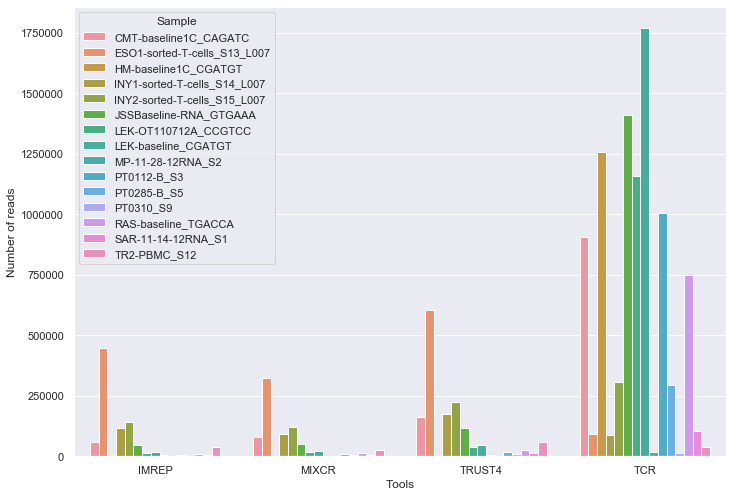

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x = 'tools', y = 'total_reads_in_sample', hue = 'Sample', data = merge_df_reshape, ax = ax)
ax.set(xlabel = 'Tools', ylabel = 'Number of reads')

#### - Number of clones

[Text(0, 0.5, 'Number of clonal types'), Text(0.5, 0, 'Tools')]

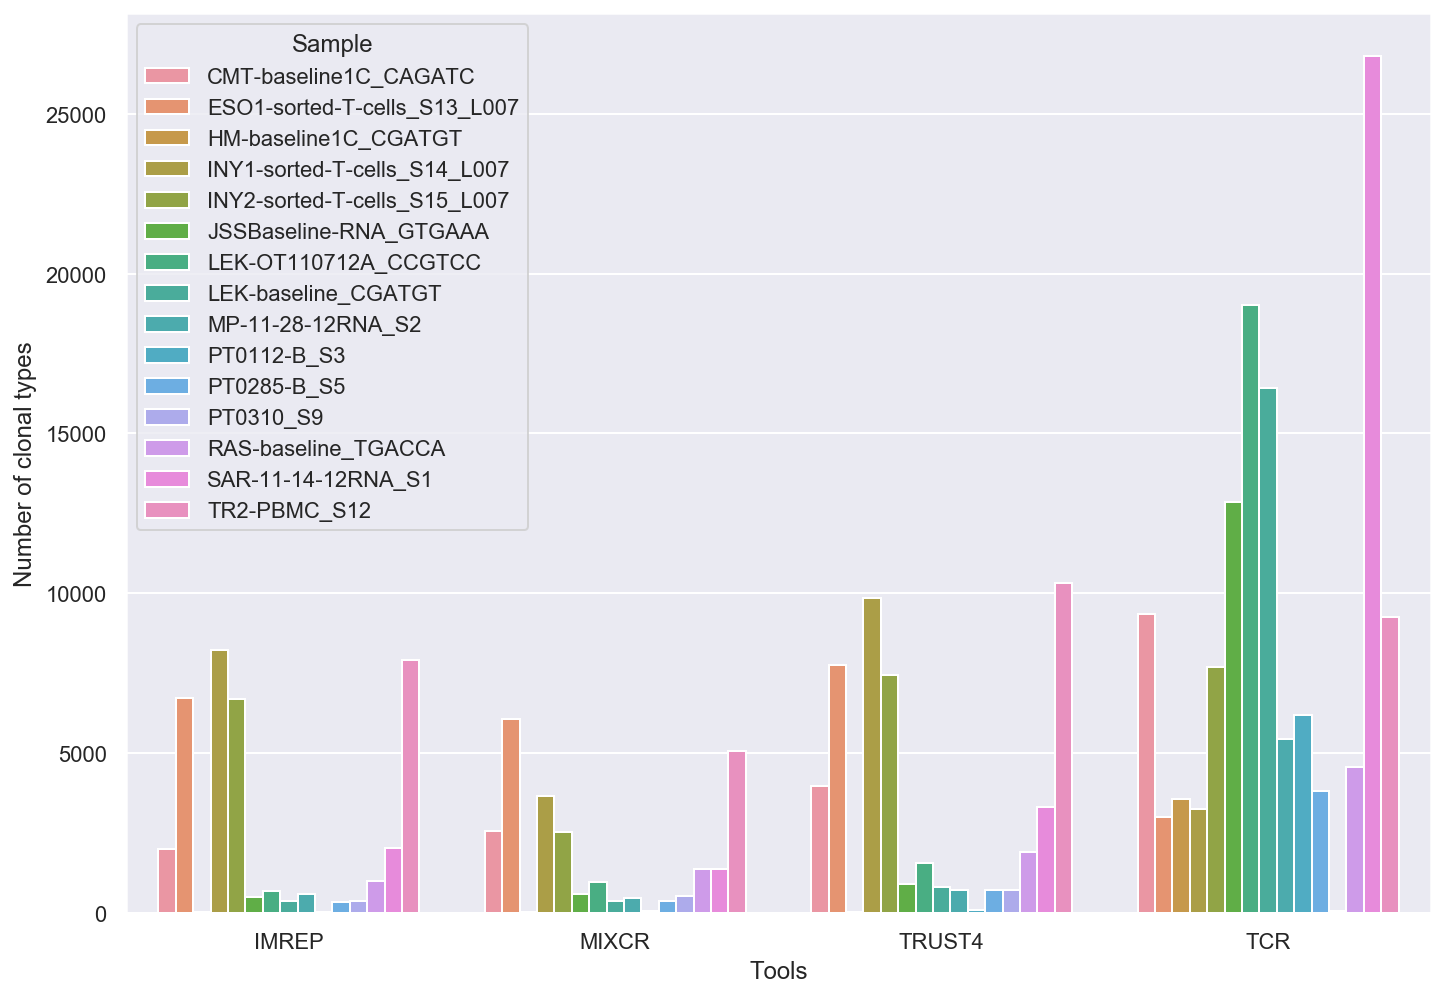

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x = 'tools', y = 'CDR3', hue = 'Sample', data = merge_df_reshape, ax = ax)
ax.set(xlabel = 'Tools', ylabel = 'Number of clonal types')

### In subsampled dataset

In [61]:
sub_IMREP_df_reshape = sub_IMREP_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
MIXCR_df_reshape = MIXCR_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
TRUST4_df_reshape = TRUST4_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})
sub_TCR_df_reshape = sub_TCR_df.groupby(['Sample']).agg({'CDR3':'count', 'total_reads_in_sample': 'mean'})

sub_IMREP_df_reshape['tools'] = 'IMREP'
MIXCR_df_reshape['tools'] = 'MIXCR'
TRUST4_df_reshape['tools'] = 'TRUST4'
sub_TCR_df_reshape['tools'] = 'TCR'

merge_subsample_df_reshape = pd.concat([sub_IMREP_df_reshape, MIXCR_df_reshape, TRUST4_df_reshape, sub_TCR_df_reshape])
merge_subsample_df_reshape.reset_index(inplace=True)

#### - Number of supporting reads

[Text(0, 0.5, 'Number of reads'), Text(0.5, 0, 'Tools')]

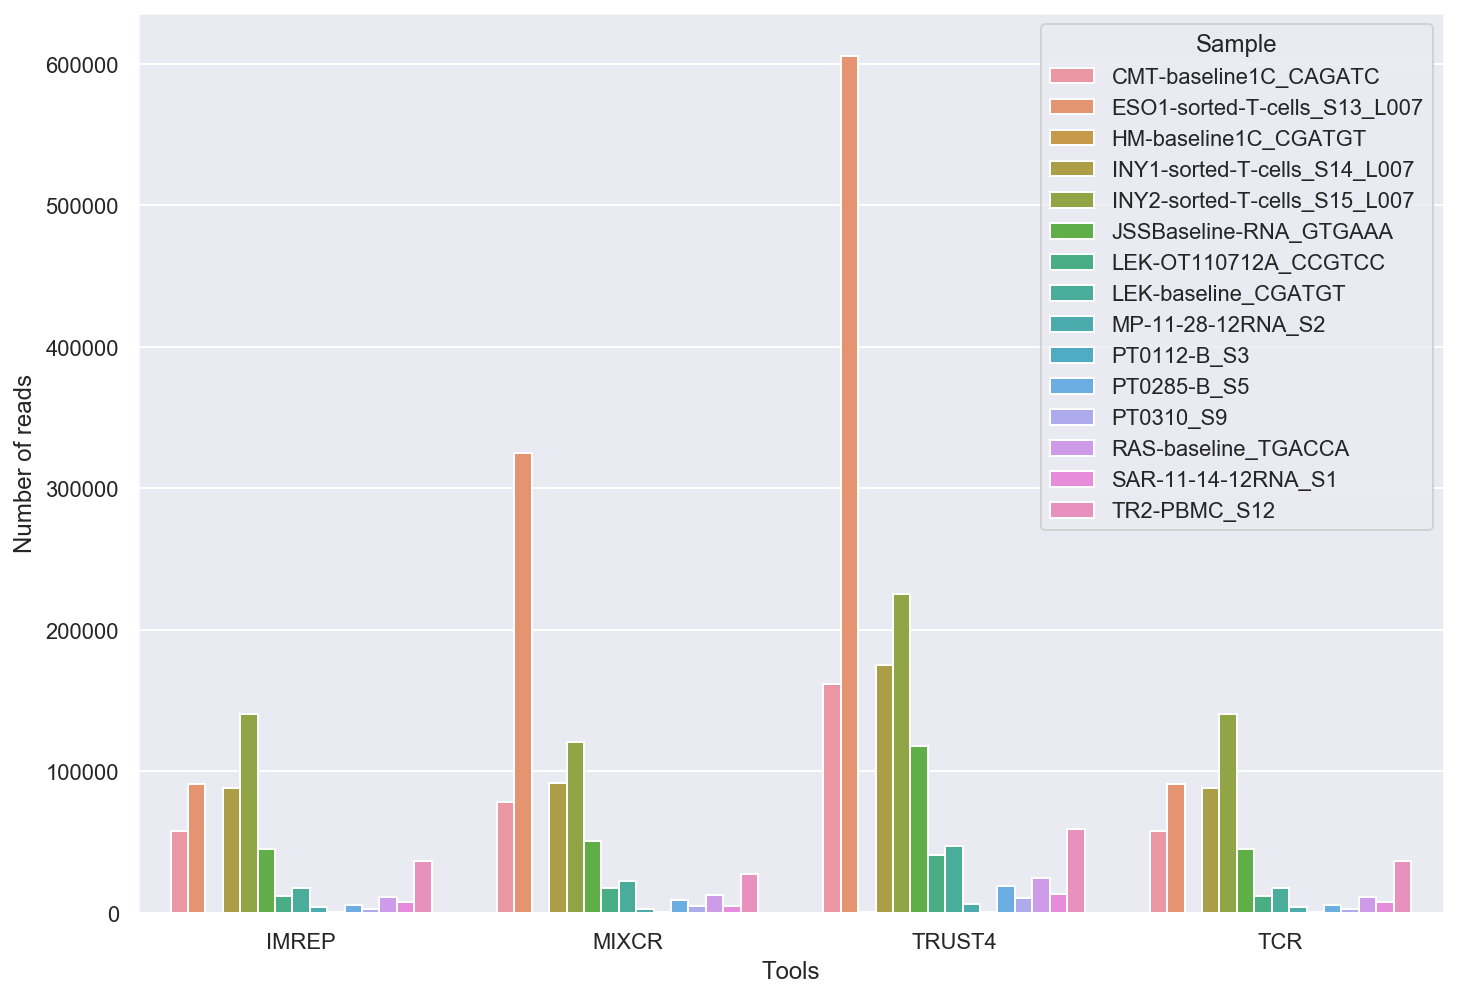

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x = 'tools', y = 'total_reads_in_sample', hue = 'Sample', data = merge_subsample_df_reshape, ax = ax)
ax.set(xlabel = 'Tools', ylabel = 'Number of reads')

#### - Number of clones

[Text(0, 0.5, 'Number of clonal types'), Text(0.5, 0, 'Tools')]

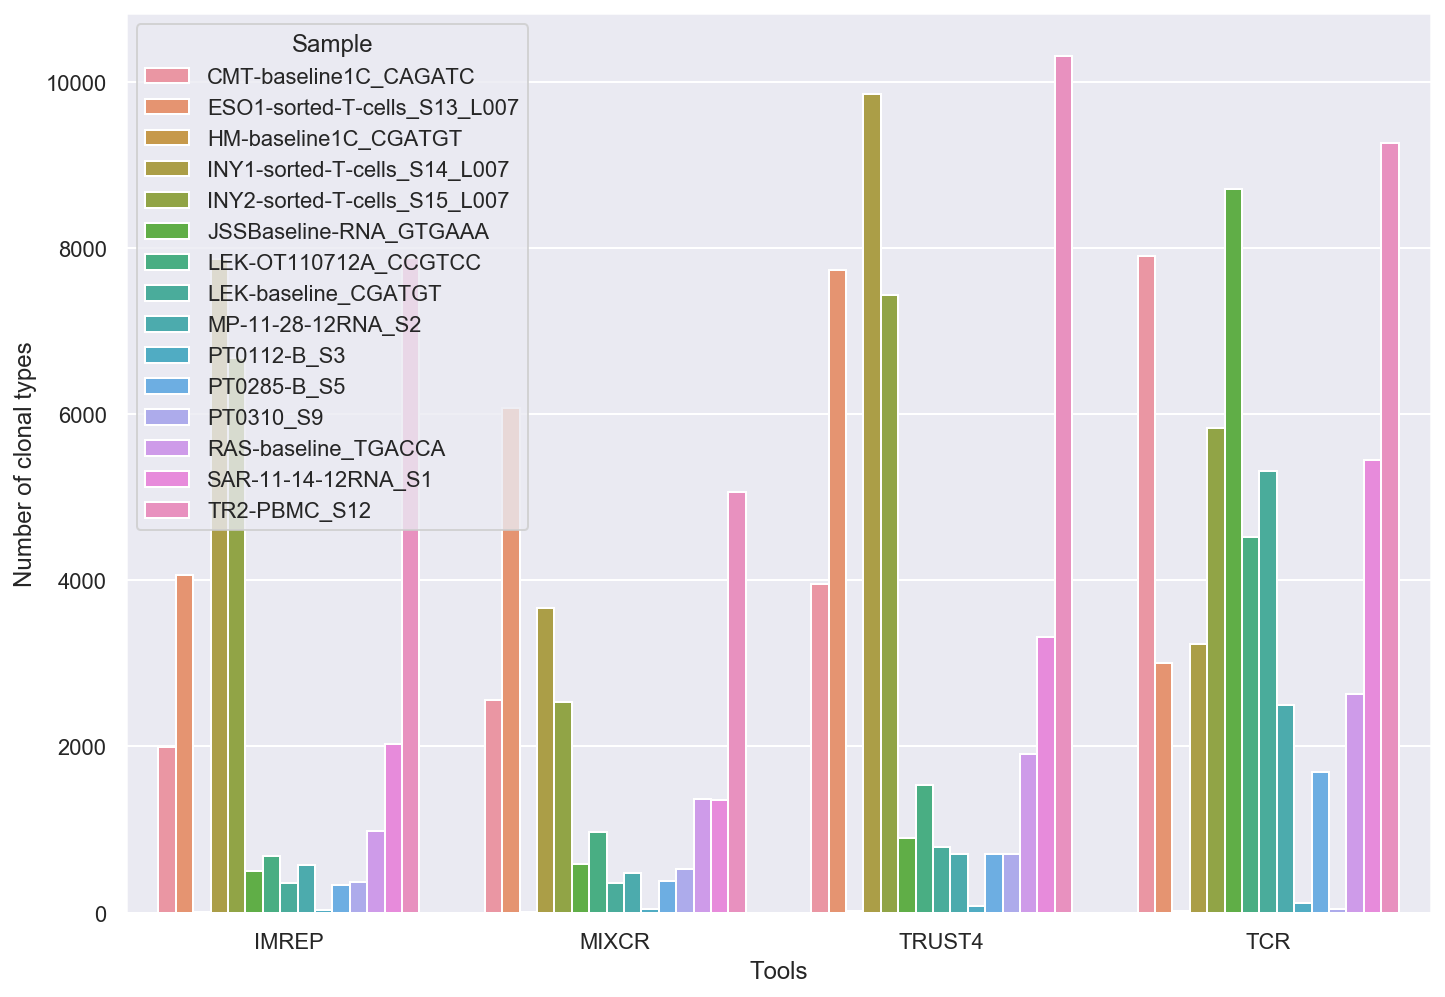

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x = 'tools', y = 'CDR3', hue = 'Sample', data = merge_subsample_df_reshape, ax = ax)
ax.set(xlabel = 'Tools', ylabel = 'Number of clonal types')

## Normalized clone size for each sample

In [64]:
normalized_size = pd.concat([IMREP_df_reshape, MIXCR_df_reshape, TRUST4_df_reshape, TCR_df_reshape], axis = 1)
normalized_size.reset_index(inplace = True)
normalized_size = normalized_size.drop(['tools'], axis = 1)
normalized_size.columns = ['Sample', 'IMREP_CDR3', 'IMREP_total_reads_in_sample', 'MIXCR_CDR3', 'MIXCR_total_reads_in_sample',
                          'TRUST4_CDR3', 'TRUST4_total_reads_in_sample', 'TCR_CDR3', 'TCR_total_reads_in_sample']
normalized_size['normalized_IMREP_CDR3'] = normalized_size['IMREP_CDR3']/normalized_size['IMREP_total_reads_in_sample']
normalized_size['normalized_MIXCR_CDR3'] = normalized_size['MIXCR_CDR3']/normalized_size['MIXCR_total_reads_in_sample']
normalized_size['normalized_TRUST4_CDR3'] = normalized_size['TRUST4_CDR3']/normalized_size['TRUST4_total_reads_in_sample']
normalized_size['normalized_TCR_CDR3'] = normalized_size['TCR_CDR3']/normalized_size['TCR_total_reads_in_sample']
normalized_size['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
normalized_size.head()

,Sample,IMREP_CDR3,IMREP_total_reads_in_sample,MIXCR_CDR3,MIXCR_total_reads_in_sample,TRUST4_CDR3,TRUST4_total_reads_in_sample,TCR_CDR3,TCR_total_reads_in_sample,normalized_IMREP_CDR3,normalized_MIXCR_CDR3,normalized_TRUST4_CDR3,normalized_TCR_CDR3,sample_type
0,CMT-baseline1C_CAGATC,1989,57747,2565,77835,3952,161687,9354,906121,0.034443,0.032954,0.024442,0.010323,tumor
1,ESO1-sorted-T-cells_S13_L007,6728,449177,6074,324638,7740,605240,3001,90577,0.014979,0.018710,0.012788,0.033132,PBMC
2,HM-baseline1C_CGATGT,8,28,7,21,24,81,3548,1257571,0.285714,0.333333,0.296296,0.002821,tumor
3,INY1-sorted-T-cells_S14_L007,8210,116267,3663,91702,9856,174847,3229,87762,0.070613,0.039945,0.056369,0.036793,PBMC
4,INY2-sorted-T-cells_S15_L007,6678,140293,2537,120854,7437,225170,7697,305953,0.047600,0.020992,0.033028,0.025157,PBMC


## Subsampled normlized clonal size for each sample

In [66]:
sub_normalized_size = pd.concat([sub_IMREP_df_reshape, MIXCR_df_reshape, TRUST4_df_reshape, sub_TCR_df_reshape], axis = 1)
sub_normalized_size.reset_index(inplace = True)
sub_normalized_size = sub_normalized_size.drop(['tools'], axis = 1)
sub_normalized_size.columns = ['Sample', 'IMREP_CDR3', 'IMREP_total_reads_in_sample', 'MIXCR_CDR3', 'MIXCR_total_reads_in_sample',
                          'TRUST4_CDR3', 'TRUST4_total_reads_in_sample', 'TCR_CDR3', 'TCR_total_reads_in_sample']
sub_normalized_size['normalized_IMREP_CDR3'] = sub_normalized_size['IMREP_CDR3']/sub_normalized_size['IMREP_total_reads_in_sample']
sub_normalized_size['normalized_MIXCR_CDR3'] = sub_normalized_size['MIXCR_CDR3']/sub_normalized_size['MIXCR_total_reads_in_sample']
sub_normalized_size['normalized_TRUST4_CDR3'] = sub_normalized_size['TRUST4_CDR3']/sub_normalized_size['TRUST4_total_reads_in_sample']
sub_normalized_size['normalized_TCR_CDR3'] = sub_normalized_size['TCR_CDR3']/sub_normalized_size['TCR_total_reads_in_sample']
sub_normalized_size['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
sub_normalized_size.head()

,Sample,IMREP_CDR3,IMREP_total_reads_in_sample,MIXCR_CDR3,MIXCR_total_reads_in_sample,TRUST4_CDR3,TRUST4_total_reads_in_sample,TCR_CDR3,TCR_total_reads_in_sample,normalized_IMREP_CDR3,normalized_MIXCR_CDR3,normalized_TRUST4_CDR3,normalized_TCR_CDR3,sample_type
0,CMT-baseline1C_CAGATC,1989,57747.0,2565,77835,3952,161687,7910,57747.0,0.034443,0.032954,0.024442,0.136977,tumor
1,ESO1-sorted-T-cells_S13_L007,4065,90577.0,6074,324638,7740,605240,3001,90577.0,0.044879,0.018710,0.012788,0.033132,PBMC
2,HM-baseline1C_CGATGT,8,28.0,7,21,24,81,17,28.0,0.285714,0.333333,0.296296,0.607143,tumor
3,INY1-sorted-T-cells_S14_L007,7873,87762.0,3663,91702,9856,174847,3229,87762.0,0.089709,0.039945,0.056369,0.036793,PBMC
4,INY2-sorted-T-cells_S15_L007,6678,140293.0,2537,120854,7437,225170,5829,140293.0,0.047600,0.020992,0.033028,0.041549,PBMC


## Clone size relative error for each RNA-seq based tool

### Overall average relative error

In [67]:
np.mean(np.abs(sub_normalized_size['TCR_CDR3'] - sub_normalized_size['IMREP_CDR3'])/sub_normalized_size['TCR_CDR3'])

1.141477217502717

In [68]:
np.mean(np.abs(sub_normalized_size['TCR_CDR3'] - sub_normalized_size['MIXCR_CDR3'])/sub_normalized_size['TCR_CDR3'])

1.3534213038112362

In [69]:
np.mean(np.abs(sub_normalized_size['TCR_CDR3'] - sub_normalized_size['TRUST4_CDR3'])/sub_normalized_size['TCR_CDR3'])

1.644552513517989

### PBMC average relative error

In [141]:
sub_normalized_PBMC_size = sub_normalized_size[sub_normalized_size['sample_type'] == 'PBMC']

In [71]:
#IMREP relative error
np.mean(np.abs(sub_normalized_PBMC_size['TCR_CDR3'] - sub_normalized_PBMC_size['IMREP_CDR3'])/sub_normalized_PBMC_size['TCR_CDR3'])

0.5806385359493353

In [72]:
#MIXCR relative error
np.mean(np.abs(sub_normalized_PBMC_size['TCR_CDR3'] - sub_normalized_PBMC_size['MIXCR_CDR3'])/sub_normalized_PBMC_size['TCR_CDR3'])

0.6233228814177935

In [78]:
# TRUST4 relative error
np.mean(np.abs(sub_normalized_PBMC_size['TCR_CDR3'] - sub_normalized_PBMC_size['TRUST4_CDR3'])/sub_normalized_PBMC_size['TCR_CDR3'])

0.8549117386836119

### Tumor average relative error

In [142]:
sub_normalized_tumor_size = sub_normalized_size[sub_normalized_size['sample_type'] == 'tumor']

In [75]:
# IMREP
np.mean(np.abs(sub_normalized_tumor_size['TCR_CDR3'] - sub_normalized_tumor_size['IMREP_CDR3'])/sub_normalized_tumor_size['TCR_CDR3'])

1.515369671871638

In [76]:
# MIXCR
np.mean(np.abs(sub_normalized_tumor_size['TCR_CDR3'] - sub_normalized_tumor_size['MIXCR_CDR3'])/sub_normalized_tumor_size['TCR_CDR3'])

1.840153585406865

In [77]:
# TRUST4
np.mean(np.abs(sub_normalized_tumor_size['TCR_CDR3'] - sub_normalized_tumor_size['TRUST4_CDR3'])/sub_normalized_tumor_size['TCR_CDR3'])

2.1709796967409067

### Clone size scatter plots with original data

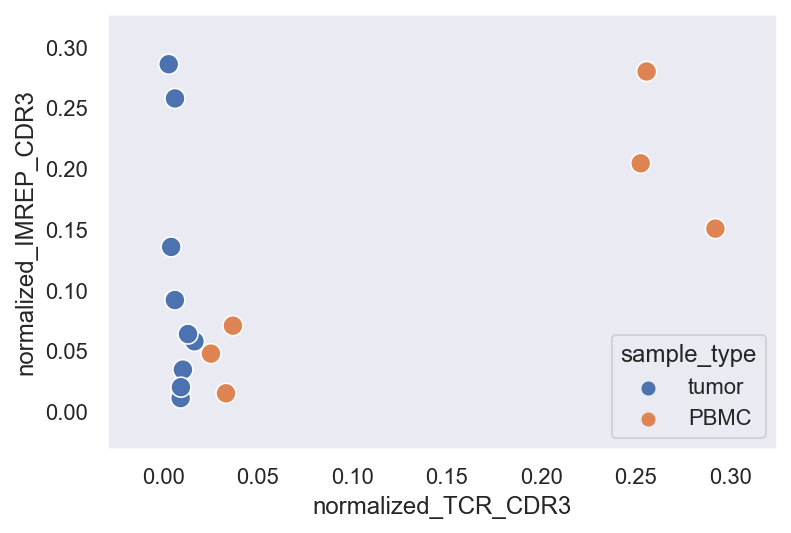

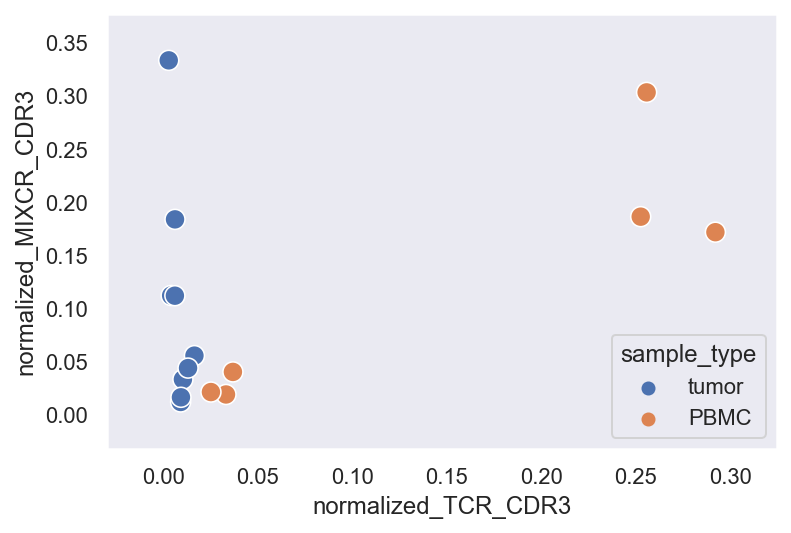

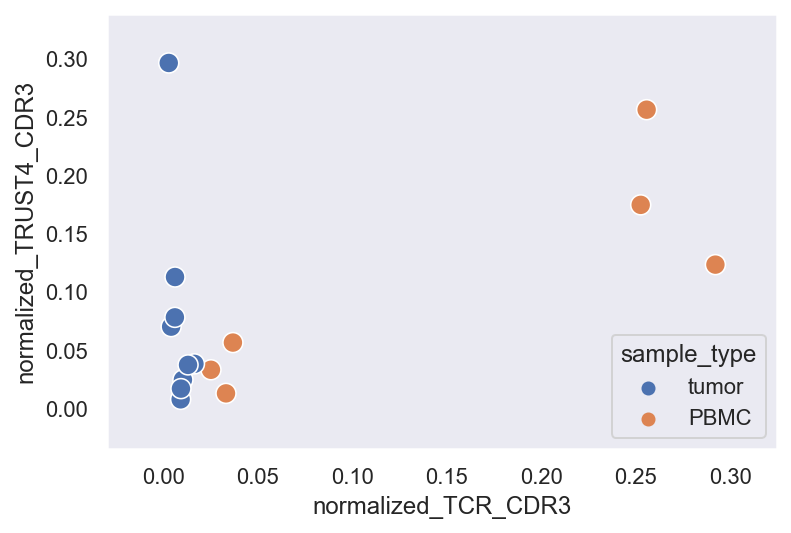

In [79]:
ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_IMREP_CDR3', hue = 'sample_type', s = 100, data = normalized_size)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_MIXCR_CDR3', hue = 'sample_type', s = 100, data = normalized_size)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_TRUST4_CDR3', hue = 'sample_type', s = 100, data = normalized_size)
ax.grid(False)
plt.show()

### Clone size plots with subsampled data

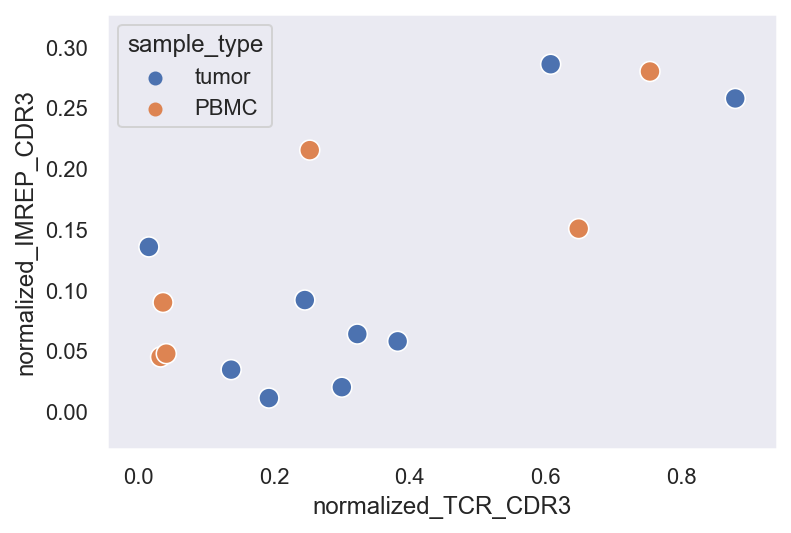

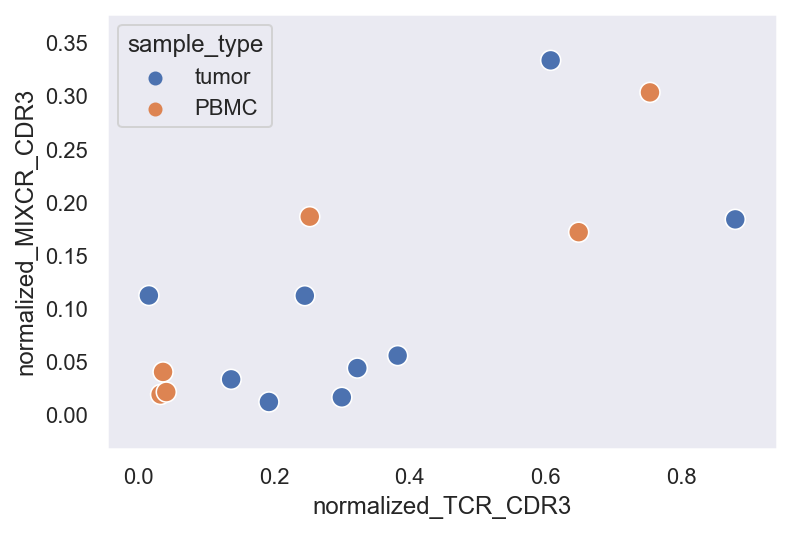

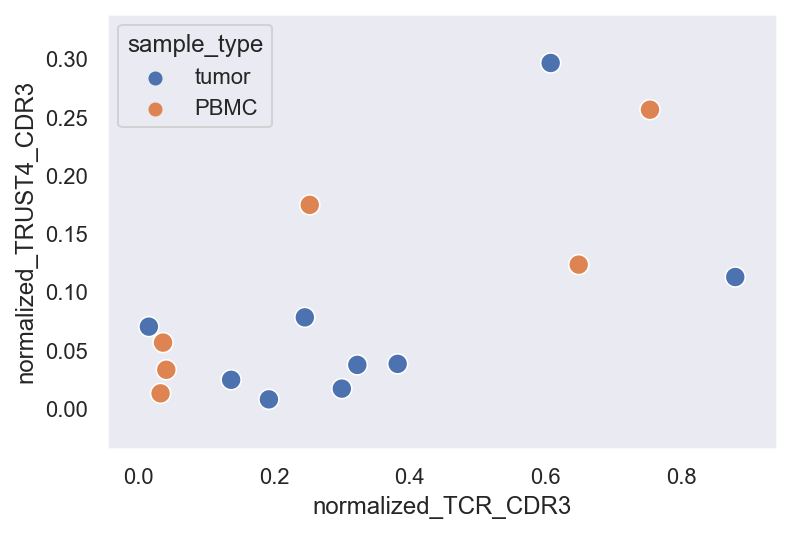

In [80]:
ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_IMREP_CDR3', hue = 'sample_type', s = 100, data = sub_normalized_size)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_MIXCR_CDR3', hue = 'sample_type', s = 100, data = sub_normalized_size)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'normalized_TCR_CDR3', y = 'normalized_TRUST4_CDR3', hue = 'sample_type', s = 100, data = sub_normalized_size)
ax.grid(False)
plt.show()

## SDI relative error (subsampled data)

### Overall average

In [14]:
#IMREP
np.mean(np.abs(sub_diversity_df['TCR_diversity'] - sub_diversity_df['IMREP_diversity'])/sub_diversity_df['TCR_diversity'])

0.6526884486618839

In [15]:
#MIXCR
np.mean(np.abs(sub_diversity_df['TCR_diversity'] - sub_diversity_df['MIXCR_diversity'])/sub_diversity_df['TCR_diversity'])

0.49626235123578577

In [16]:
#TRUST4
np.mean(np.abs(sub_diversity_df['TCR_diversity'] - sub_diversity_df['TRUST4_diversity'])/sub_diversity_df['TCR_diversity'])

0.6494207630536163

### PBMC SDI relative error

In [17]:
sub_PBMC_diversity_df = sub_diversity_df[sub_diversity_df['sample_type'] == 'PBMC']

In [18]:
#IMREP
np.mean(np.abs(sub_PBMC_diversity_df['TCR_diversity'] - sub_PBMC_diversity_df['IMREP_diversity'])/sub_PBMC_diversity_df['TCR_diversity'])

0.7223351483432509

In [19]:
#MIXCR
np.mean(np.abs(sub_PBMC_diversity_df['TCR_diversity'] - sub_PBMC_diversity_df['MIXCR_diversity'])/sub_PBMC_diversity_df['TCR_diversity'])

0.3472537833399476

In [20]:
#TRUST4
np.mean(np.abs(sub_PBMC_diversity_df['TCR_diversity'] - sub_PBMC_diversity_df['TRUST4_diversity'])/sub_PBMC_diversity_df['TCR_diversity'])

0.725189223621063

## Tumor SDI relative error

In [21]:
sub_tumor_diversity_df = sub_diversity_df[sub_diversity_df['sample_type'] == 'tumor']

In [22]:
#IMREP
np.mean(np.abs(sub_tumor_diversity_df['TCR_diversity'] - sub_tumor_diversity_df['IMREP_diversity'])/sub_tumor_diversity_df['TCR_diversity'])

0.6062573155409726

In [23]:
#MIXCR
np.mean(np.abs(sub_tumor_diversity_df['TCR_diversity'] - sub_tumor_diversity_df['MIXCR_diversity'])/sub_tumor_diversity_df['TCR_diversity'])

0.595601396499678

In [24]:
#TRUST4
np.mean(np.abs(sub_tumor_diversity_df['TCR_diversity'] - sub_tumor_diversity_df['TRUST4_diversity'])/sub_tumor_diversity_df['TCR_diversity'])

0.598908456008652

### Monoclonal SDI relative error

In [25]:
#IMREP
np.mean(np.abs(monoclonal['TCR_diversity'] - monoclonal['IMREP_diversity'])/monoclonal['TCR_diversity'])

1.6161992606294968

In [26]:
#MIXCR
np.mean(np.abs(monoclonal['TCR_diversity'] - monoclonal['MIXCR_diversity'])/monoclonal['TCR_diversity'])

1.0839366544902618

In [27]:
#TRUST4
np.mean(np.abs(monoclonal['TCR_diversity'] - monoclonal['TRUST4_diversity'])/monoclonal['TCR_diversity'])

1.691058480698102

### Polyclonal SDI relative error

In [28]:
#IMREP
np.mean(np.abs(polyclonal['TCR_diversity'] - polyclonal['IMREP_diversity'])/polyclonal['TCR_diversity'])

0.302320880673661

In [29]:
#MIXCR
np.mean(np.abs(polyclonal['TCR_diversity'] - polyclonal['MIXCR_diversity'])/polyclonal['TCR_diversity'])

0.2825626045977946

In [30]:
#TRUST4
np.mean(np.abs(polyclonal['TCR_diversity'] - polyclonal['TRUST4_diversity'])/polyclonal['TCR_diversity'])

0.27064341118289426

## Comparison of SDI of original data

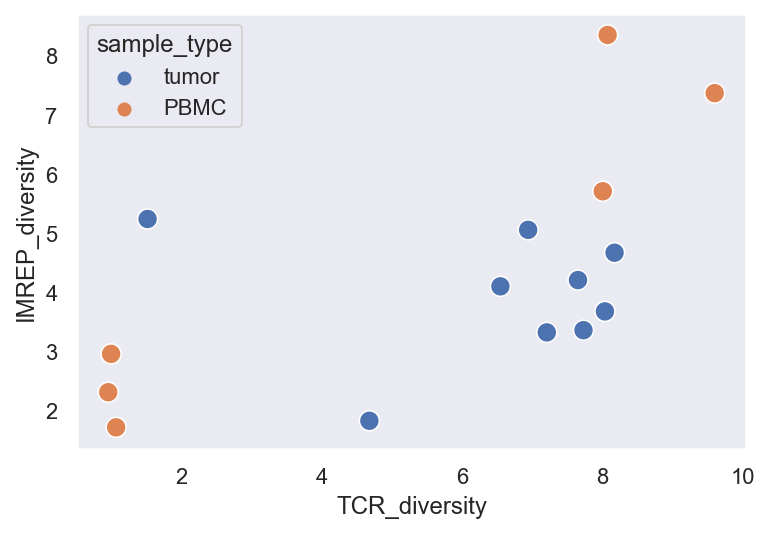

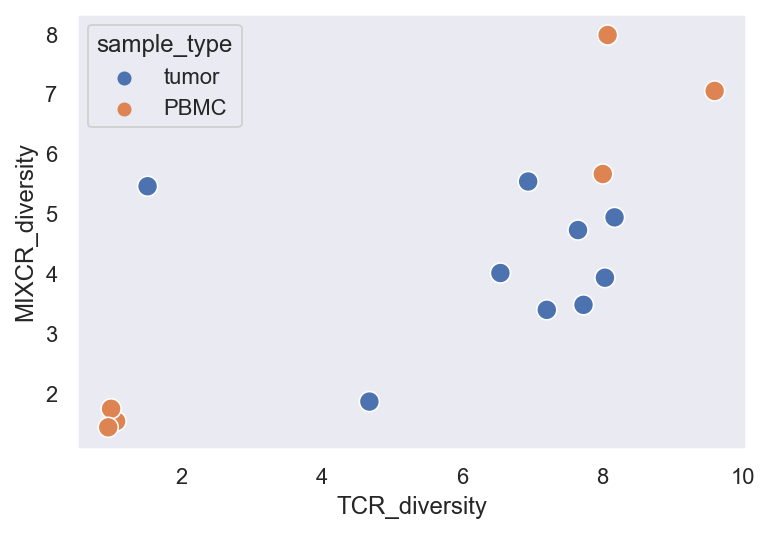

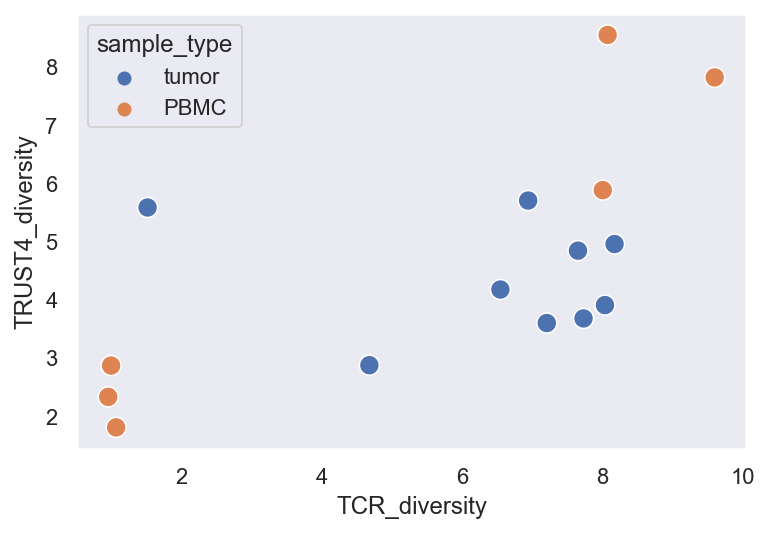

In [96]:
ax = sns.scatterplot(x = 'TCR_diversity', y = 'IMREP_diversity', hue = 'sample_type', s = 100, data = diversity_df)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'MIXCR_diversity', hue = 'sample_type', s = 100, data = diversity_df)
ax.grid(False)
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'TRUST4_diversity', hue = 'sample_type', s = 100, data = diversity_df)
ax.grid(False)
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

## Comparison of SDI on subsampled data

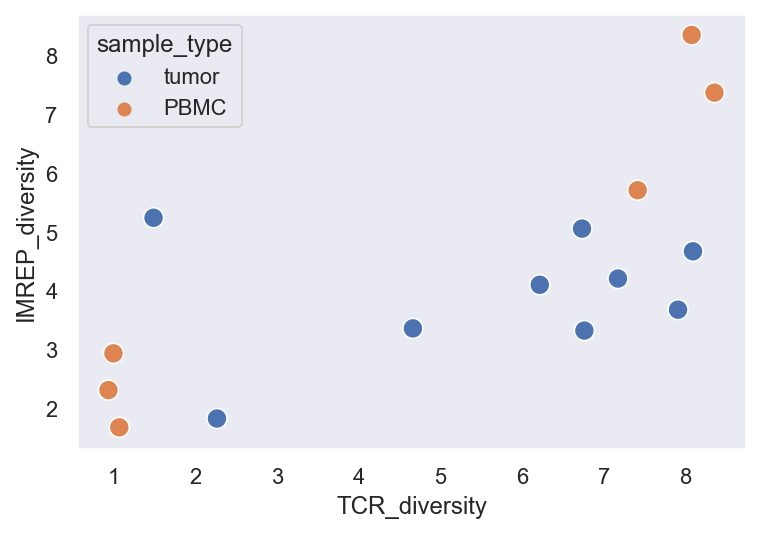

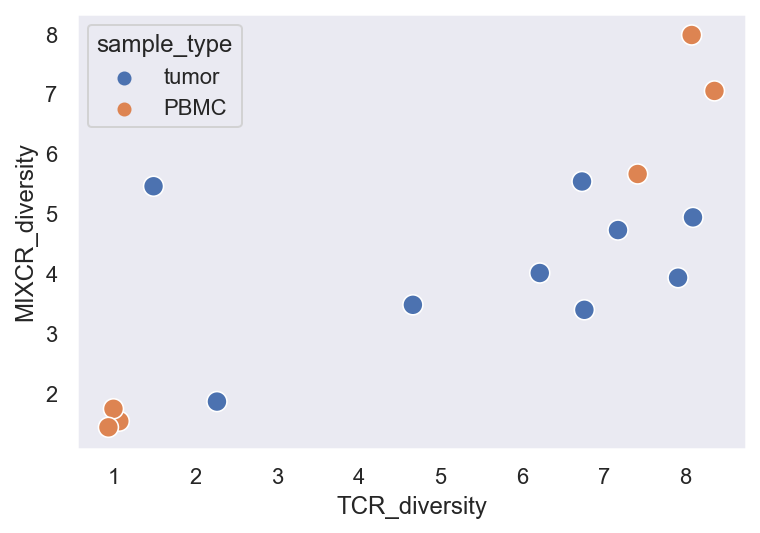

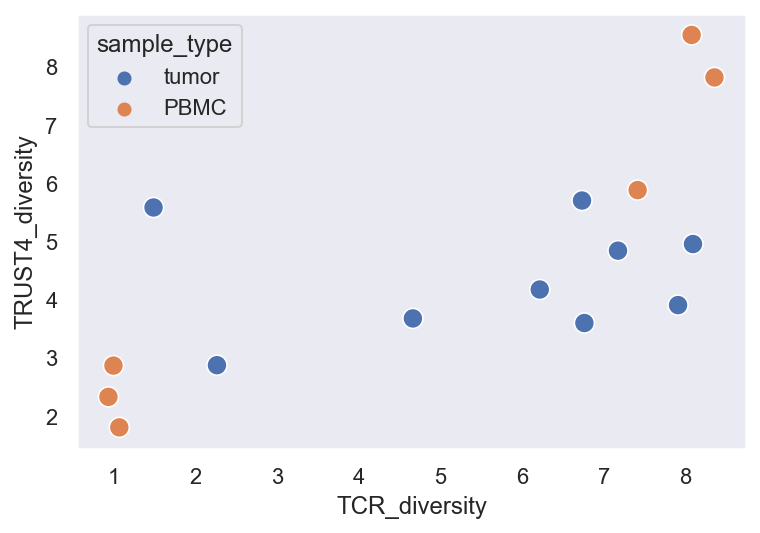

In [97]:
ax = sns.scatterplot(x = 'TCR_diversity', y = 'IMREP_diversity', hue = 'sample_type', s = 100, data = sub_diversity_df)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'MIXCR_diversity', hue = 'sample_type', s = 100, data = sub_diversity_df)
ax.grid(False)
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'TRUST4_diversity', hue = 'sample_type', s = 100, data = sub_diversity_df)
ax.grid(False)
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

### diversity correlation in PBMC samples

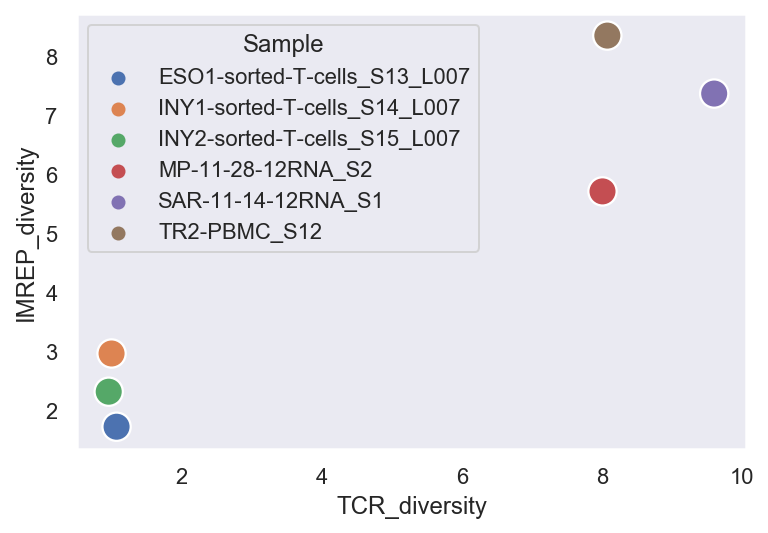

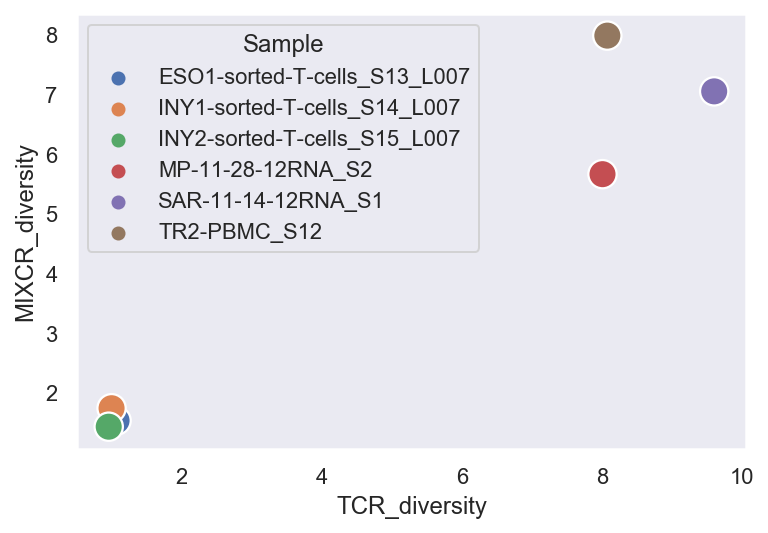

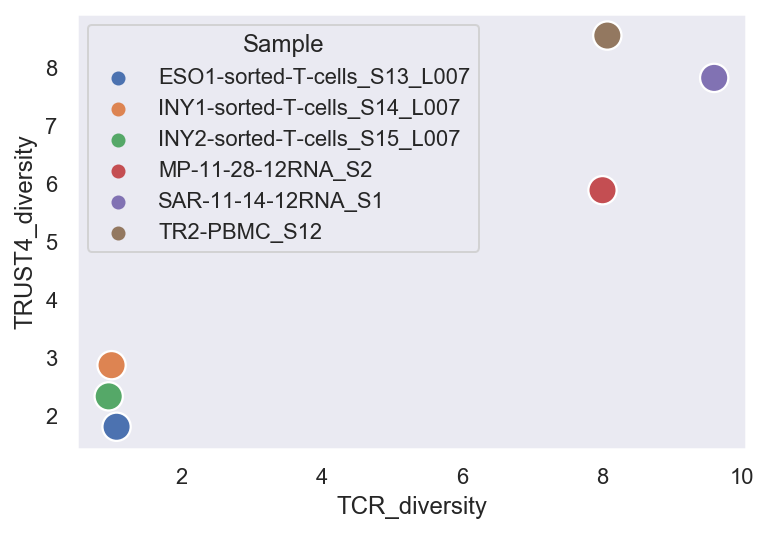

In [47]:
PBMC_diversity_df = diversity_df[diversity_df['sample_type'] == 'PBMC']
ax = sns.scatterplot(x = 'TCR_diversity', y = 'IMREP_diversity', hue = 'Sample', s = 200, data = PBMC_diversity_df)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'MIXCR_diversity', hue = 'Sample', s = 200, data = PBMC_diversity_df)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_diversity', y = 'TRUST4_diversity', hue = 'Sample', s = 200, data = PBMC_diversity_df)
ax.grid(False)
plt.show()

### diversity correlation in tumor samples

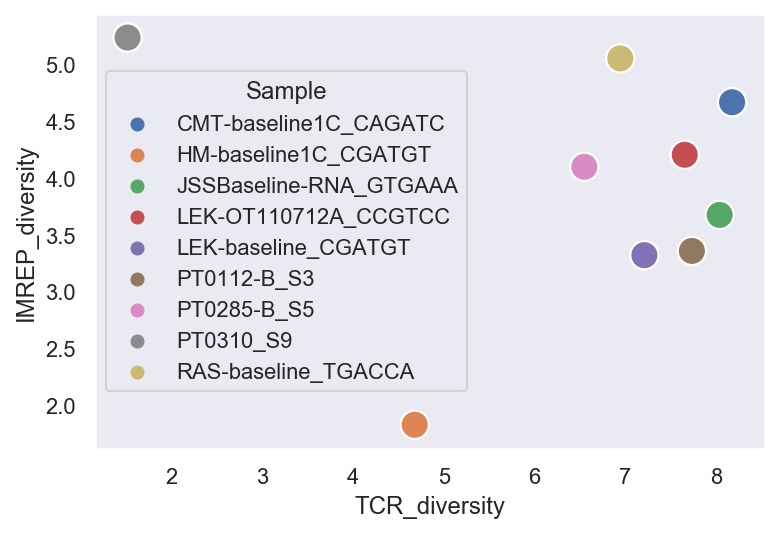

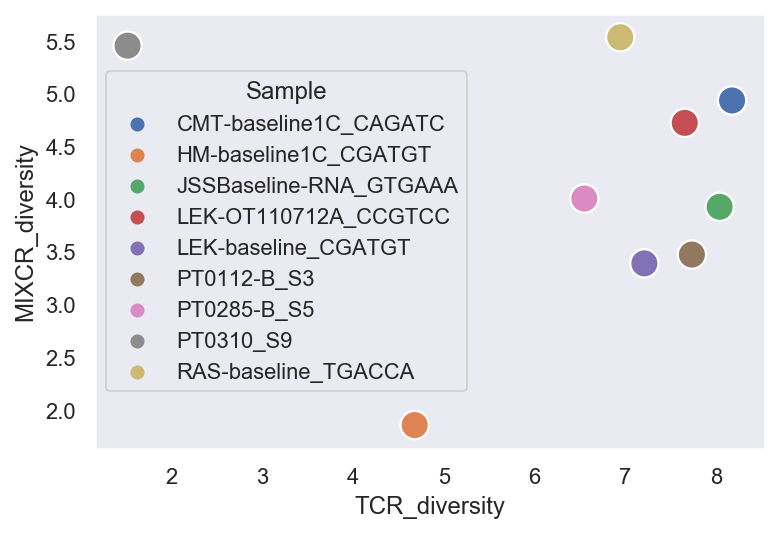

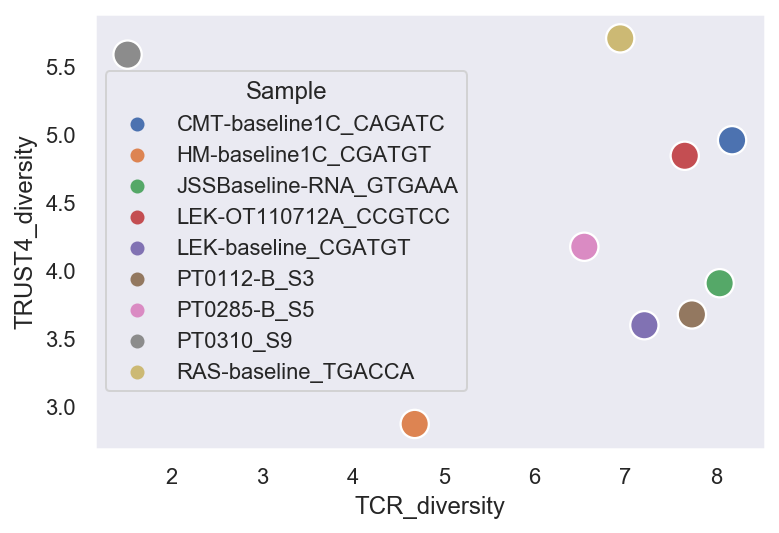

In [48]:
tumor_diversity_df = diversity_df[diversity_df['sample_type'] == 'tumor']
ax = sns.scatterplot(x = 'TCR_diversity', y = 'IMREP_diversity', hue = 'Sample', s = 200, data = tumor_diversity_df)
ax.grid(False)
plt.show()
ax = sns.scatterplot(x = 'TCR_diversity', y = 'MIXCR_diversity', hue = 'Sample', s = 200, data = tumor_diversity_df)
ax.grid(False)
plt.show()
ax = sns.scatterplot(x = 'TCR_diversity', y = 'TRUST4_diversity', hue = 'Sample', s = 200, data = tumor_diversity_df)
ax.grid(False)
plt.show()

## Largest clone frequency comparison (original data)

In [103]:
IMREP_trans = IMREP_df.groupby(['Sample']).apply(lambda t: t[t.Frequency_IMREP==t.Frequency_IMREP.max()])
MIXCR_trans = MIXCR_df.groupby(['Sample']).apply(lambda t: t[t.Frequency_MIXCR==t.Frequency_MIXCR.max()])
TRUST4_trans = TRUST4_df.groupby(['Sample']).apply(lambda t: t[t.Frequency_TRUST4==t.Frequency_TRUST4.max()])
TCR_trans = TCR_df.groupby(['Sample']).apply(lambda t: t[t.Frequency_TCR==t.Frequency_TCR.max()])

IMREP_max_clone  = []
MIXCR_max_clone  = []
TRUST4_max_clone  = []
TCR_max_clone  = []

IMREP_max_clone_freq = []
MIXCR_max_clone_freq = []
TRUST4_max_clone_freq = []
TCR_max_clone_freq = []

for sample in sample_names: 
    IMREP_max_clone_freq.append(IMREP_trans[IMREP_trans['Sample'] == sample]['Frequency_IMREP'][0])
    IMREP_max_clone.append(IMREP_trans[IMREP_trans['Sample'] == sample]['CDR3'][0])
    
    MIXCR_max_clone_freq.append(MIXCR_trans[MIXCR_trans['Sample'] == sample]['Frequency_MIXCR'][0])
    MIXCR_max_clone.append(MIXCR_trans[MIXCR_trans['Sample'] == sample]['CDR3'][0])
                                                       
    TRUST4_max_clone_freq.append(TRUST4_trans[TRUST4_trans['Sample'] == sample]['Frequency_TRUST4'][0])
    TRUST4_max_clone.append(TRUST4_trans[TRUST4_trans['Sample'] == sample]['CDR3'][0])
                                                         
    TCR_max_clone_freq.append(TCR_trans[TCR_trans['Sample'] == sample]['Frequency_TCR'][0])
    TCR_max_clone.append(TCR_trans[TCR_trans['Sample'] == sample]['CDR3'][0])                                                     
    
max_clone_freq = pd.DataFrame({'Sample': sample_names,
                              'IMREP_max_clone_freq': IMREP_max_clone_freq,
                              'MIXCR_max_clone_freq': MIXCR_max_clone_freq,
                              'TRUST4_max_clone_freq': TRUST4_max_clone_freq, 
                              'TCR_max_clone_freq': TCR_max_clone_freq,
                              'IMREP_max_clone': IMREP_max_clone ,
                              'MIXCR_max_clone': MIXCR_max_clone ,
                              'TRUST4_max_clone': TRUST4_max_clone , 
                              'TCR_max_clone': TCR_max_clone
                              })

max_clone_freq['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']

max_clone_freq = max_clone_freq[['Sample', 'sample_type', 'IMREP_max_clone_freq', 'MIXCR_max_clone_freq', 'TRUST4_max_clone_freq', 'TCR_max_clone_freq', 'IMREP_max_clone', 'MIXCR_max_clone', 'TRUST4_max_clone', 'TCR_max_clone']]
max_clone_freq

,Sample,sample_type,IMREP_max_clone_freq,MIXCR_max_clone_freq,TRUST4_max_clone_freq,TCR_max_clone_freq,IMREP_max_clone,MIXCR_max_clone,TRUST4_max_clone,TCR_max_clone
0,CMT-baseline1C_CAGATC,tumor,0.249641,0.206205,0.256625,0.011468,CQSADSSATSWVF,CQSADSSATSWVF,CQSADSSATSWVF,CAISDSGTSNTEAFF
1,ESO1-sorted-T-cells_S13_L007,PBMC,0.470670,0.546113,0.490632,0.903298,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CASSYVGNTGELFF
2,HM-baseline1C_CGATGT,tumor,0.392857,0.238095,0.160494,0.405293,CASGGSYIPTF,CQQGYSTPYTF,CASSEGPGGSSYNEQFF,CASSEGPGGSSYNEQFF
3,INY1-sorted-T-cells_S14_L007,PBMC,0.404104,0.493119,0.406086,0.911887,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CASSYVGNTGELFF,CASSYVGNTGELFF
4,INY2-sorted-T-cells_S15_L007,PBMC,0.467308,0.529540,0.430453,0.917314,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CASSYVGNTGELFF
5,JSSBaseline-RNA_GTGAAA,tumor,0.120004,0.130625,0.146269,0.017781,CQHYNSYSGTF,CQHYNSYSGTF,CQHYNSYSGTF,CASSFGTGGYTEAFF
6,LEK-OT110712A_CCGTCC,tumor,0.239341,0.173734,0.194202,0.038212,CQQYGSSPYTF,CATWDDTPSGPTWVF,CATWDDTPSGPTWVF,CASSFRGDRNEQFF
7,LEK-baseline_CGATGT,tumor,0.286899,0.247166,0.247579,0.043142,CQQYNSYPLTF,CQQYNSYPLTF,CQQYNSYPLTF,CASSPTGSTEAFF
8,MP-11-28-12RNA_S2,PBMC,0.048597,0.044792,0.037360,0.028952,CVVGDYKLSF,CVVGDYKLSF,CVVGDYKLSF,CAIKEELGPGNEQFF
9,PT0112-B_S3,tumor,0.083333,0.109375,0.109589,0.028239,CAAWTDNLNGWVF,CQVWDARSDHPVF,CQLWDEGWVF,CASSYVGNTGELFF


## TCR largest clone in other tools (original data)

In [133]:
TCR_max_clone_in_IMREP = []
TCR_max_clone_in_MIXCR = []
TCR_max_clone_in_TRUST4 = []

for sample in sample_names:
    TCR_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['TCR_max_clone'].to_numpy()[0]
    if len(IMREP_df[(IMREP_df['Sample'] == sample) & (IMREP_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP']) > 0:
        TCR_max_clone_in_IMREP.append(IMREP_df[(IMREP_df['Sample'] == sample) & (IMREP_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP'].to_numpy()[0])
    else:
        TCR_max_clone_in_IMREP.append(0)
    if len(MIXCR_df[(MIXCR_df['Sample'] == sample) & (MIXCR_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR']) > 0:
        TCR_max_clone_in_MIXCR.append(MIXCR_df[(MIXCR_df['Sample'] == sample) & (MIXCR_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR'].to_numpy()[0])
    else:
        TCR_max_clone_in_MIXCR.append(0)
    if len(TRUST4_df[(TRUST4_df['Sample'] == sample) & (TRUST4_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4']) > 0:
        TCR_max_clone_in_TRUST4.append(TRUST4_df[(TRUST4_df['Sample'] == sample) & (TRUST4_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4'].to_numpy()[0])
    else:
        TCR_max_clone_in_TRUST4.append(0)
        
TCR_max_clone_in_tools = pd.DataFrame({'TCR_largest_clone': max_clone_freq['TCR_max_clone'],
                                       'TCR_largest_clone_freq': max_clone_freq['TCR_max_clone_freq'],
                                       'in_IMREP': TCR_max_clone_in_IMREP,
                                       'in_MIXCR': TCR_max_clone_in_MIXCR, 
                                       'in_TRUST4': TCR_max_clone_in_TRUST4})

TCR_max_clone_in_tools['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
TCR_max_clone_in_tools['Sample'] = sample_names
TCR_max_clone_in_tools

,TCR_largest_clone,TCR_largest_clone_freq,in_IMREP,in_MIXCR,in_TRUST4,sample_type,Sample
0,CAISDSGTSNTEAFF,0.011468,0.000087,0.000051,0.000080,tumor,CMT-baseline1C_CAGATC
1,CASSYVGNTGELFF,0.903298,0.435096,0.377972,0.390954,PBMC,ESO1-sorted-T-cells_S13_L007
2,CASSEGPGGSSYNEQFF,0.405293,0.000000,0.000000,0.160494,tumor,HM-baseline1C_CGATGT
3,CASSYVGNTGELFF,0.911887,0.380357,0.409031,0.406086,PBMC,INY1-sorted-T-cells_S14_L007
4,CASSYVGNTGELFF,0.917314,0.376804,0.385457,0.372687,PBMC,INY2-sorted-T-cells_S15_L007
5,CASSFGTGGYTEAFF,0.017781,0.000000,0.000000,0.000000,tumor,JSSBaseline-RNA_GTGAAA
6,CASSFRGDRNEQFF,0.038212,0.004897,0.003881,0.003791,tumor,LEK-OT110712A_CCGTCC
7,CASSPTGSTEAFF,0.043142,0.000113,0.000089,0.000043,tumor,LEK-baseline_CGATGT
8,CAIKEELGPGNEQFF,0.028952,0.003119,0.002913,0.002968,PBMC,MP-11-28-12RNA_S2
9,CASSYVGNTGELFF,0.028239,0.000000,0.000000,0.000000,tumor,PT0112-B_S3


##  Largest clone frequency comparison (subsampled data)

In [105]:
IMREP_trans = sub_IMREP_df.groupby(['Sample']).apply(lambda t: t[t.Frequency_IMREP==t.Frequency_IMREP.max()])
MIXCR_trans = MIXCR_df.groupby(['Sample']).apply(lambda t: t[t.Frequency_MIXCR==t.Frequency_MIXCR.max()])
TRUST4_trans = TRUST4_df.groupby(['Sample']).apply(lambda t: t[t.Frequency_TRUST4==t.Frequency_TRUST4.max()])
TCR_trans = sub_TCR_df.groupby(['Sample']).apply(lambda t: t[t.Frequency_TCR==t.Frequency_TCR.max()])

IMREP_max_clone  = []
MIXCR_max_clone  = []
TRUST4_max_clone  = []
TCR_max_clone  = []

IMREP_max_clone_freq = []
MIXCR_max_clone_freq = []
TRUST4_max_clone_freq = []
TCR_max_clone_freq = []

for sample in sample_names: 
    IMREP_max_clone_freq.append(IMREP_trans[IMREP_trans['Sample'] == sample]['Frequency_IMREP'][0])
    IMREP_max_clone.append(IMREP_trans[IMREP_trans['Sample'] == sample]['CDR3'][0])
    
    MIXCR_max_clone_freq.append(MIXCR_trans[MIXCR_trans['Sample'] == sample]['Frequency_MIXCR'][0])
    MIXCR_max_clone.append(MIXCR_trans[MIXCR_trans['Sample'] == sample]['CDR3'][0])
                                                       
    TRUST4_max_clone_freq.append(TRUST4_trans[TRUST4_trans['Sample'] == sample]['Frequency_TRUST4'][0])
    TRUST4_max_clone.append(TRUST4_trans[TRUST4_trans['Sample'] == sample]['CDR3'][0])
                                                         
    TCR_max_clone_freq.append(TCR_trans[TCR_trans['Sample'] == sample]['Frequency_TCR'][0])
    TCR_max_clone.append(TCR_trans[TCR_trans['Sample'] == sample]['CDR3'][0])                                                     
    
sub_max_clone_freq = pd.DataFrame({'Sample': sample_names,
                              'IMREP_max_clone_freq': IMREP_max_clone_freq,
                              'MIXCR_max_clone_freq': MIXCR_max_clone_freq,
                              'TRUST4_max_clone_freq': TRUST4_max_clone_freq, 
                              'TCR_max_clone_freq': TCR_max_clone_freq,
                              'IMREP_max_clone': IMREP_max_clone ,
                              'MIXCR_max_clone': MIXCR_max_clone ,
                              'TRUST4_max_clone': TRUST4_max_clone , 
                              'TCR_max_clone': TCR_max_clone
                              })

sub_max_clone_freq['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']

sub_max_clone_freq = sub_max_clone_freq[['Sample', 'sample_type', 'IMREP_max_clone_freq', 'MIXCR_max_clone_freq', 'TRUST4_max_clone_freq', 'TCR_max_clone_freq', 'IMREP_max_clone', 'MIXCR_max_clone', 'TRUST4_max_clone', 'TCR_max_clone']]
sub_max_clone_freq

,Sample,sample_type,IMREP_max_clone_freq,MIXCR_max_clone_freq,TRUST4_max_clone_freq,TCR_max_clone_freq,IMREP_max_clone,MIXCR_max_clone,TRUST4_max_clone,TCR_max_clone
0,CMT-baseline1C_CAGATC,tumor,0.249641,0.206205,0.256625,0.010615,CQSADSSATSWVF,CQSADSSATSWVF,CQSADSSATSWVF,CAISDSGTSNTEAFF
1,ESO1-sorted-T-cells_S13_L007,PBMC,0.472361,0.546113,0.490632,0.903298,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CASSYVGNTGELFF
2,HM-baseline1C_CGATGT,tumor,0.392857,0.238095,0.160494,0.428571,CASGGSYIPTF,CQQGYSTPYTF,CASSEGPGGSSYNEQFF,CASSEGPGGSSYNEQFF
3,INY1-sorted-T-cells_S14_L007,PBMC,0.404811,0.493119,0.406086,0.911887,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CASSYVGNTGELFF,CASSYVGNTGELFF
4,INY2-sorted-T-cells_S15_L007,PBMC,0.467308,0.529540,0.430453,0.917473,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CAVRPLYGGSYIPTF,CASSYVGNTGELFF
5,JSSBaseline-RNA_GTGAAA,tumor,0.120004,0.130625,0.146269,0.017453,CQHYNSYSGTF,CQHYNSYSGTF,CQHYNSYSGTF,CASSFGTGGYTEAFF
6,LEK-OT110712A_CCGTCC,tumor,0.239341,0.173734,0.194202,0.036893,CQQYGSSPYTF,CATWDDTPSGPTWVF,CATWDDTPSGPTWVF,CASKDGTGSYNEQFF
7,LEK-baseline_CGATGT,tumor,0.286899,0.247166,0.247579,0.044837,CQQYNSYPLTF,CQQYNSYPLTF,CQQYNSYPLTF,CASSPTGSTEAFF
8,MP-11-28-12RNA_S2,PBMC,0.048597,0.044792,0.037360,0.030146,CVVGDYKLSF,CVVGDYKLSF,CVVGDYKLSF,CAIKEELGPGNEQFF
9,PT0112-B_S3,tumor,0.083333,0.109375,0.109589,0.053030,CAAWTDNLNGWVF,CQVWDARSDHPVF,CQLWDEGWVF,CASSYVGNTGELFF


## TCR largest clone in other tools (subsampled data)

In [106]:
TCR_max_clone_in_IMREP = []
TCR_max_clone_in_MIXCR = []
TCR_max_clone_in_TRUST4 = []

for sample in sample_names:
    TCR_largest_clone = sub_max_clone_freq[sub_max_clone_freq['Sample'] == sample]['TCR_max_clone'].to_numpy()[0]
    if len(sub_IMREP_df[(sub_IMREP_df['Sample'] == sample) & (sub_IMREP_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP']) > 0:
        TCR_max_clone_in_IMREP.append(sub_IMREP_df[(sub_IMREP_df['Sample'] == sample) & (sub_IMREP_df['CDR3'] == TCR_largest_clone)]['Frequency_IMREP'].to_numpy()[0])
    else:
        TCR_max_clone_in_IMREP.append(0)
    if len(MIXCR_df[(MIXCR_df['Sample'] == sample) & (MIXCR_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR']) > 0:
        TCR_max_clone_in_MIXCR.append(MIXCR_df[(MIXCR_df['Sample'] == sample) & (MIXCR_df['CDR3'] == TCR_largest_clone)]['Frequency_MIXCR'].to_numpy()[0])
    else:
        TCR_max_clone_in_MIXCR.append(0)
    if len(TRUST4_df[(TRUST4_df['Sample'] == sample) & (TRUST4_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4']) > 0:
        TCR_max_clone_in_TRUST4.append(TRUST4_df[(TRUST4_df['Sample'] == sample) & (TRUST4_df['CDR3'] == TCR_largest_clone)]['Frequency_TRUST4'].to_numpy()[0])
    else:
        TCR_max_clone_in_TRUST4.append(0)
        
sub_TCR_max_clone_in_tools = pd.DataFrame({'TCR_largest_clone': sub_max_clone_freq['TCR_max_clone'],
                                       'TCR_largest_clone_freq': sub_max_clone_freq['TCR_max_clone_freq'],
                                       'in_IMREP': TCR_max_clone_in_IMREP,
                                       'in_MIXCR': TCR_max_clone_in_MIXCR, 
                                       'in_TRUST4': TCR_max_clone_in_TRUST4})

sub_TCR_max_clone_in_tools['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
sub_TCR_max_clone_in_tools['Sample'] = sample_names
sub_TCR_max_clone_in_tools = sub_TCR_max_clone_in_tools[['Sample', 'sample_type', 'TCR_largest_clone', 'TCR_largest_clone_freq', 'in_IMREP', 'in_MIXCR', 'in_TRUST4']]
sub_TCR_max_clone_in_tools

,Sample,sample_type,TCR_largest_clone,TCR_largest_clone_freq,in_IMREP,in_MIXCR,in_TRUST4
0,CMT-baseline1C_CAGATC,tumor,CAISDSGTSNTEAFF,0.010615,0.000087,0.000051,0.000080
1,ESO1-sorted-T-cells_S13_L007,PBMC,CASSYVGNTGELFF,0.903298,0.433940,0.377972,0.390954
2,HM-baseline1C_CGATGT,tumor,CASSEGPGGSSYNEQFF,0.428571,0.000000,0.000000,0.160494
3,INY1-sorted-T-cells_S14_L007,PBMC,CASSYVGNTGELFF,0.911887,0.380609,0.409031,0.406086
4,INY2-sorted-T-cells_S15_L007,PBMC,CASSYVGNTGELFF,0.917473,0.376804,0.385457,0.372687
5,JSSBaseline-RNA_GTGAAA,tumor,CASSFGTGGYTEAFF,0.017453,0.000000,0.000000,0.000000
6,LEK-OT110712A_CCGTCC,tumor,CASKDGTGSYNEQFF,0.036893,0.002617,0.003082,0.002577
7,LEK-baseline_CGATGT,tumor,CASSPTGSTEAFF,0.044837,0.000113,0.000089,0.000043
8,MP-11-28-12RNA_S2,PBMC,CAIKEELGPGNEQFF,0.030146,0.003119,0.002913,0.002968
9,PT0112-B_S3,tumor,CASSYVGNTGELFF,0.053030,0.000000,0.000000,0.000000


## Scatterplot of TCR largest clone's frequency in other tools (original data)

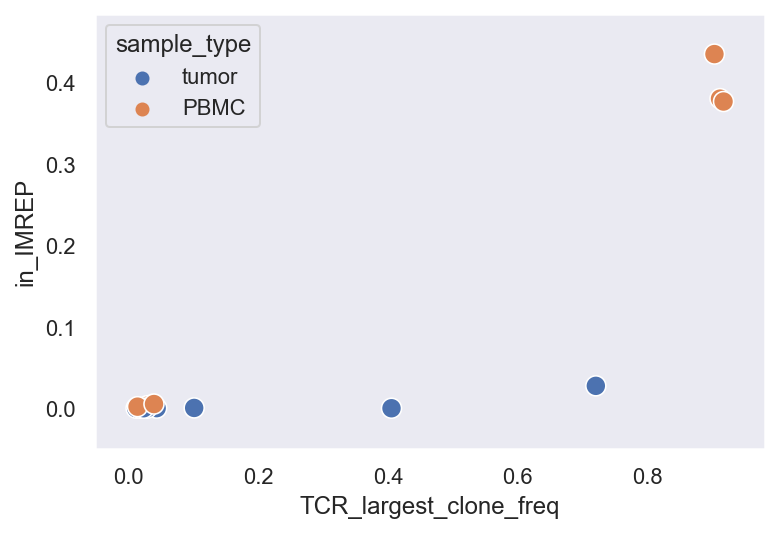

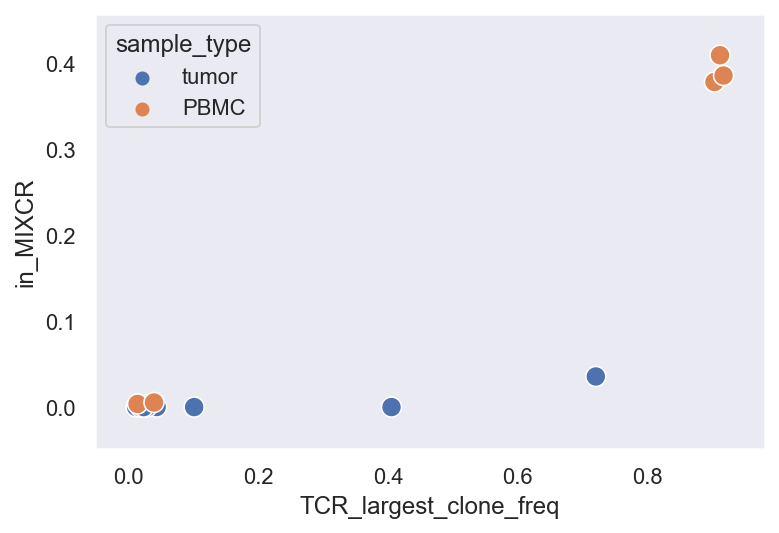

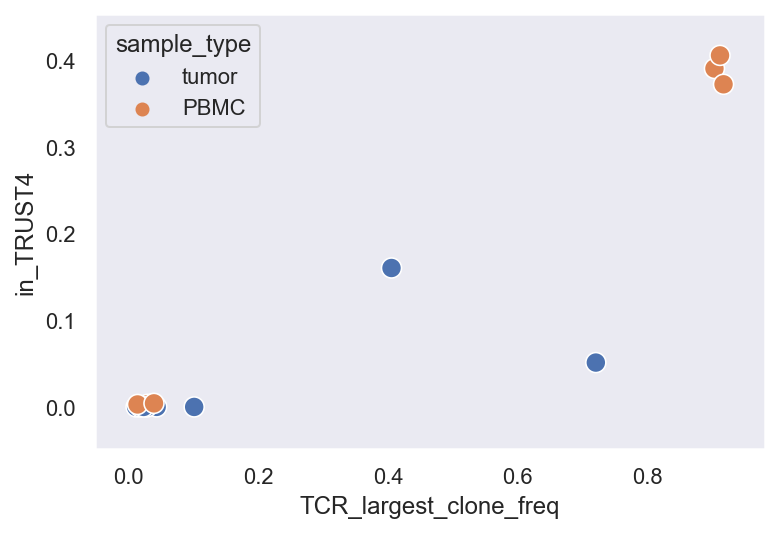

In [116]:
ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_IMREP', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_MIXCR', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_TRUST4', hue = 'sample_type', s = 100, data = TCR_max_clone_in_tools)
ax.grid(False)
plt.show()

## Scatterplot of TCR largest clone's frequency in other tools (subsampled data)

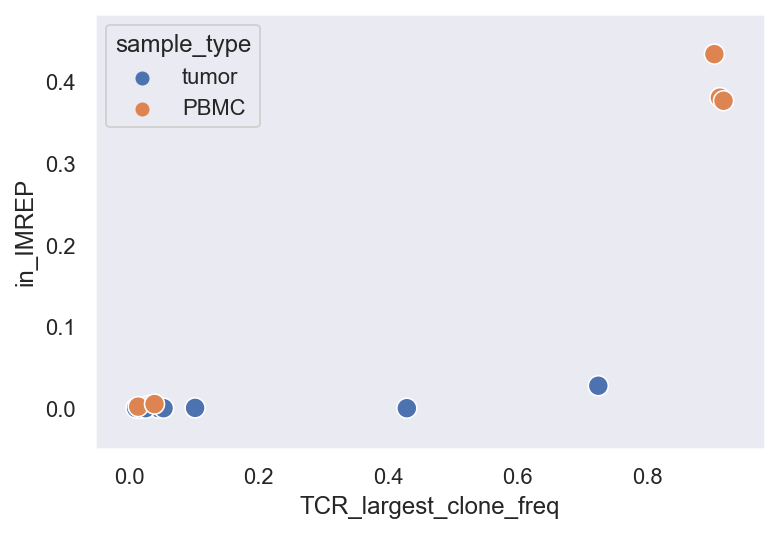

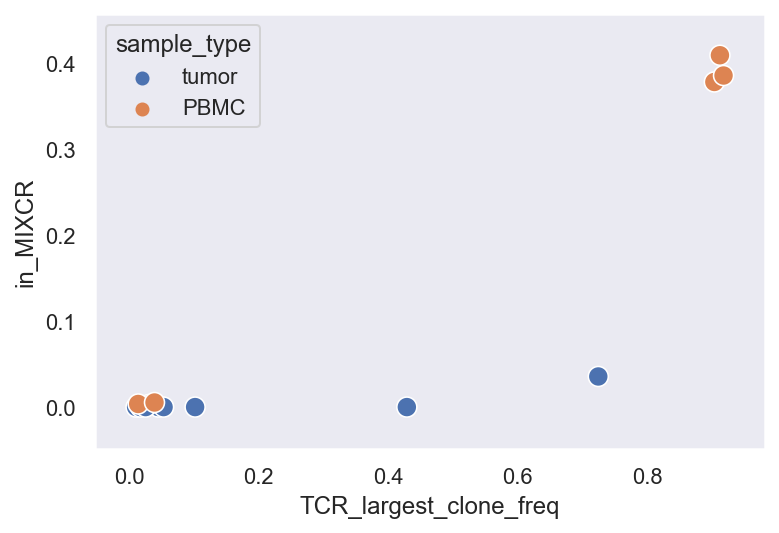

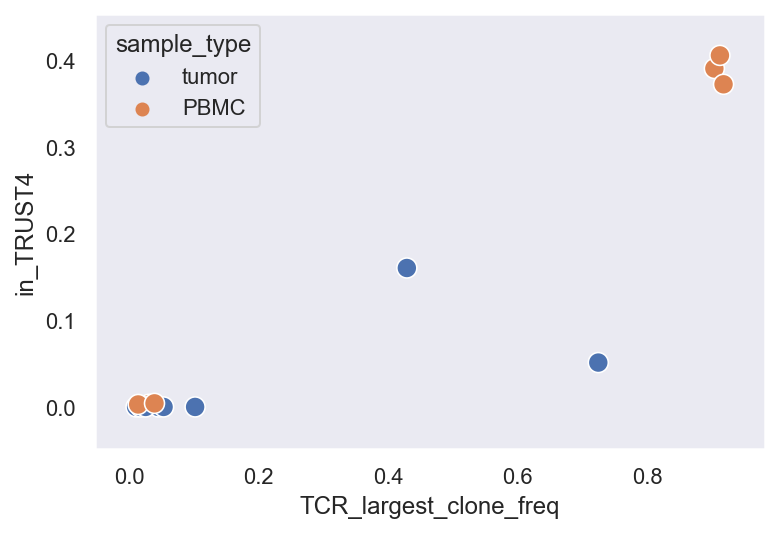

In [117]:
ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_IMREP', hue = 'sample_type', s = 100, data = sub_TCR_max_clone_in_tools)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_MIXCR', hue = 'sample_type', s = 100, data = sub_TCR_max_clone_in_tools)
ax.grid(False)
plt.show()

ax = sns.scatterplot(x = 'TCR_largest_clone_freq', y = 'in_TRUST4', hue = 'sample_type', s = 100, data = sub_TCR_max_clone_in_tools)
ax.grid(False)
plt.show()

## IMREP largest clone in TCR (original data)

In [111]:
IMREP_max_clone_in_TCR = []
for sample in sample_names:
    IMREP_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['IMREP_max_clone'].to_numpy()[0]
    if len(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == IMREP_largest_clone)]['Frequency_TCR']) > 0:
        IMREP_max_clone_in_TCR.append(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == IMREP_largest_clone)]['Frequency_TCR'].to_numpy()[0])
    else:
        IMREP_max_clone_in_TCR.append(0)

IMREP_max_clone_in_TCR_df = pd.DataFrame({'IMREP_largest_clone': max_clone_freq['IMREP_max_clone_freq'], 'in_TCR': IMREP_max_clone_in_TCR})
IMREP_max_clone_in_TCR_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
IMREP_max_clone_in_TCR_df

,IMREP_largest_clone,in_TCR,sample_type
0,0.249641,0,tumor
1,0.470670,0,PBMC
2,0.392857,0,tumor
3,0.404104,0,PBMC
4,0.467308,0,PBMC
5,0.120004,0,tumor
6,0.239341,0,tumor
7,0.286899,0,tumor
8,0.048597,0,PBMC
9,0.083333,0,tumor


## MIXCR largest clone in TCR (original data)


In [112]:
MIXCR_max_clone_in_TCR = []
for sample in sample_names:
    MIXCR_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['MIXCR_max_clone'].to_numpy()[0]
    if len(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == MIXCR_largest_clone)]['Frequency_TCR']) > 0:
        MIXCR_max_clone_in_TCR.append(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == MIXCR_largest_clone)]['Frequency_TCR'].to_numpy()[0])
    else:
        MIXCR_max_clone_in_TCR.append(0)

MIXCR_max_clone_in_TCR_df = pd.DataFrame({'MIXCR_largest_clone': max_clone_freq['MIXCR_max_clone_freq'], 'in_TCR': MIXCR_max_clone_in_TCR})
MIXCR_max_clone_in_TCR_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
MIXCR_max_clone_in_TCR_df

,MIXCR_largest_clone,in_TCR,sample_type
0,0.206205,0.000000,tumor
1,0.546113,0.000000,PBMC
2,0.238095,0.000000,tumor
3,0.493119,0.000000,PBMC
4,0.529540,0.000000,PBMC
5,0.130625,0.000000,tumor
6,0.173734,0.000000,tumor
7,0.247166,0.000000,tumor
8,0.044792,0.000000,PBMC
9,0.109375,0.000000,tumor


## TRUST4 largest clone in TCR (original data)

In [113]:
TRUST4_max_clone_in_TCR = []
for sample in sample_names:
    TRUST4_largest_clone = max_clone_freq[max_clone_freq['Sample'] == sample]['TRUST4_max_clone'].to_numpy()[0]
    if len(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == TRUST4_largest_clone)]['Frequency_TCR']) > 0:
        TRUST4_max_clone_in_TCR.append(TCR_df[(TCR_df['Sample'] == sample) & (TCR_df['CDR3'] == TRUST4_largest_clone)]['Frequency_TCR'].to_numpy()[0])
    else:
        TRUST4_max_clone_in_TCR.append(0)
TRUST4_max_clone_in_TCR_df = pd.DataFrame({'TRUST4_largest_clone': max_clone_freq['TRUST4_max_clone_freq'], 'in_TCR': TRUST4_max_clone_in_TCR})
TRUST4_max_clone_in_TCR_df['sample_type'] = ['tumor', 'PBMC', 'tumor', 'PBMC', 'PBMC', 'tumor', 'tumor', 'tumor', 'PBMC', 'tumor', 'tumor', 'tumor', 'tumor', 'PBMC', 'PBMC']
TRUST4_max_clone_in_TCR_df

,TRUST4_largest_clone,in_TCR,sample_type
0,0.256625,0.000000,tumor
1,0.490632,0.000000,PBMC
2,0.160494,0.405293,tumor
3,0.406086,0.911887,PBMC
4,0.430453,0.000000,PBMC
5,0.146269,0.000000,tumor
6,0.194202,0.000000,tumor
7,0.247579,0.000000,tumor
8,0.037360,0.000000,PBMC
9,0.109589,0.000000,tumor


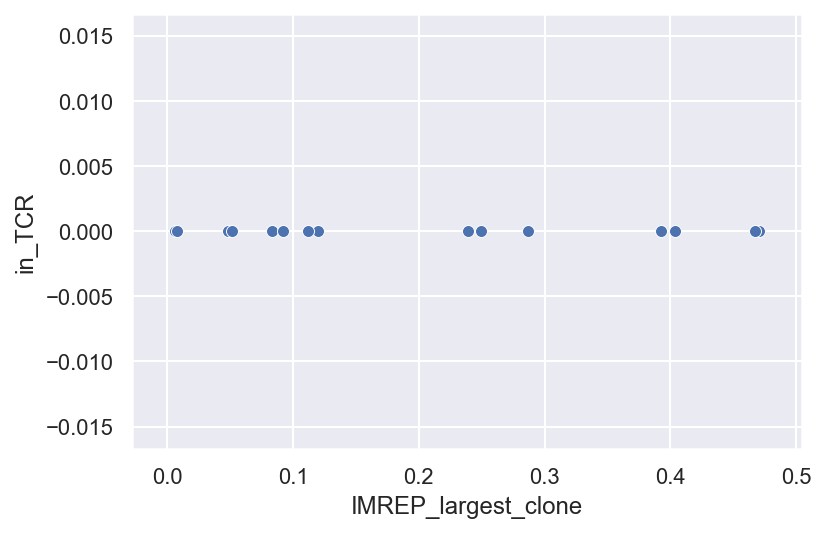

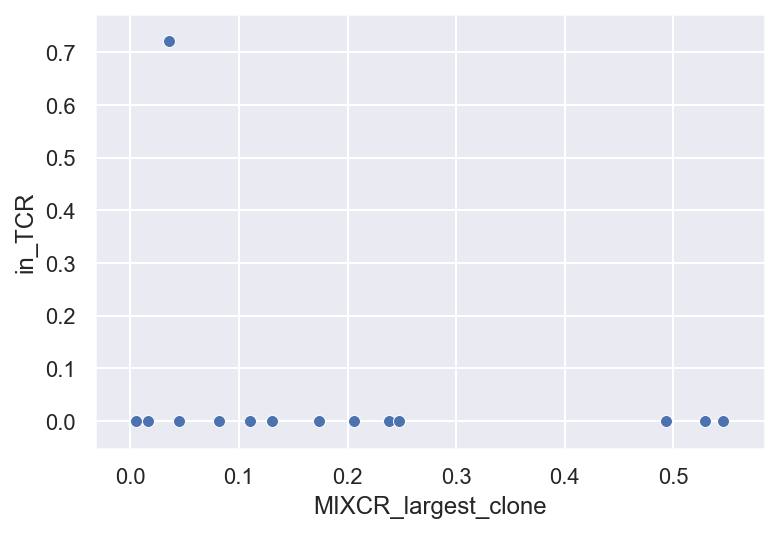

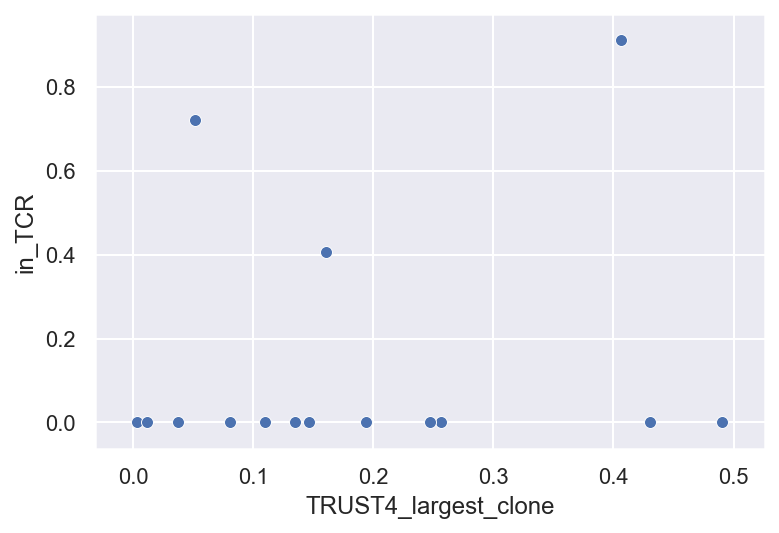

In [115]:
sns.scatterplot(x = 'IMREP_largest_clone', y = 'in_TCR', data = IMREP_max_clone_in_TCR_df)
plt.show()
sns.scatterplot(x = 'MIXCR_largest_clone', y = 'in_TCR', data = MIXCR_max_clone_in_TCR_df)
plt.show()
sns.scatterplot(x = 'TRUST4_largest_clone', y = 'in_TCR', data = TRUST4_max_clone_in_TCR_df)
plt.show()

## Venn diagram of overlapping clones (original data)

In [34]:
clonetype_overlap_df = pd.read_csv('../summary_data/complete_sample/all_tools_clonotype_overlap_stats.csv')
clonetype_overlap_df.head()

,Sample,unique_clonotypes_TCR,unique_clonotypes_IMREP,unique_clonotypes_MIXCR,unique_clonotypes_TRUST4,overlap_TCR_IMREP,overlap_TCR_MIXCR,overlap_TCR_TRUST4,overlap_IMREP_MIXCR,overlap_IMREP_TRUST4,...,overlap_TCR_MIXCR_dict_frequencies,overlap_TCR_TRUST4_dict_frequencies,overlap_IMREP_MIXCR_dict_frequencies,overlap_IMREP_TRUST4_dict_frequencies,overlap_MIXCR_TRUST4_dict_frequencies,overlap_TCR_IMREP_MIXCR_dict_frequencies,overlap_TCR_IMREP_TRUST4_dict_frequencies,overlap_TCR_MIXCR_TRUST4_dict_frequencies,overlap_IMREP_MIXCR_TRUST4_dict_frequencies,overlap_TCR_IMREP_MIXCR_TRUST4_dict_frequencies
0,CMT-baseline1C_CAGATC,9354,1989,2565,3952,59,33,120,1502,1818,...,"{'CASLRDSSYNEQFF': [0.0014026824232083795, 6.4...","{'CASSSGLAGGHEQFF': [0.000358671744722835, 3.7...","{'CQQRSHWPSF': [0.0005714582575718219, 0.00033...","{'CQQRSHWPSF': [0.0005714582575718219, 0.00032...","{'CQQSYNIPLTF': [2.5695381255219375e-05, 1.855...","{'CASLRDSSYNEQFF': [0.0014026824232083795, 0.0...","{'CSASRREGFYNEQFF': [1.43468697889134e-05, 3.4...","{'CASLRDSSYNEQFF': [0.0014026824232083795, 6.4...","{'CQQRSHWPSF': [0.0005714582575718219, 0.00033...","{'CASLRDSSYNEQFF': [0.0014026824232083795, 0.0..."
1,ESO1-sorted-T-cells_S13_L007,3001,6728,6074,7740,587,528,665,4708,5593,...,"{'CASSYYAGRNTEAFF': [2.208066065336675e-05, 1....","{'CASSYYAGRNTEAFF': [2.208066065336675e-05, 9....","{'CASSSYGGRNTGELFF': [6.6788815990133064e-06, ...","{'CSGRGTSTSTDTQYF': [8.905175465351076e-06, 1....","{'CSGRGTSTSTDTQYF': [1.2321416470037396e-05, 1...","{'CASSYYAGRNTEAFF': [2.208066065336675e-05, 1....","{'CASSYYAGRNTEAFF': [2.208066065336675e-05, 1....","{'CASSYYAGRNTEAFF': [2.208066065336675e-05, 1....","{'CATSSGRGTDTQYF': [3.116811412872876e-05, 2.1...","{'CASSYYAGRNTEAFF': [2.208066065336675e-05, 1...."
2,HM-baseline1C_CGATGT,3548,8,7,24,1,0,2,3,5,...,{},"{'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ...","{'CQQGYSTPYTF': [0.10714285714285714, 0.238095...","{'CQSYDSGLRGVF': [0.07142857142857142, 0.02469...","{'CQQSYVTPYTF': [0.23809523809523808, 0.123456...",{},"{'CASSSWRGRGSTDTQYF': [9.542204774124085e-05, ...",{},"{'CQQSYVTPYTF': [0.14285714285714285, 0.238095...",{}
3,INY1-sorted-T-cells_S14_L007,3229,8210,3663,9856,295,187,357,2732,5617,...,"{'CASSDLSGRPIYEQYF': [2.2788906360383765e-05, ...",{'CSVMGQGVFQSASGRADTQYF': [2.2788906360383765e...,"{'CAVNMGSGGGADGLTF': [3.440357109067921e-05, 2...","{'CAVYNTDKLIF': [1.7201785545339606e-05, 1.143...","{'CQSYDSSLSGVVF': [2.1809775141218293e-05, 1.1...","{'CASSDLSGRPIYEQYF': [2.2788906360383765e-05, ...","{'CASSQDWSGGASYNEQFF': [9.115562544153506e-05,...","{'CASSDLSGRPIYEQYF': [2.2788906360383765e-05, ...","{'CQSYDSSLSGVVF': [1.7201785545339606e-05, 2.1...","{'CASSDLSGRPIYEQYF': [2.2788906360383765e-05, ..."
4,INY2-sorted-T-cells_S15_L007,7697,6678,2537,7437,553,335,592,1817,4096,...,"{'CASSSGAVPSYNEQFF': [0.000124202083326524, 0....","{'CSVEGTANTEAFF': [6.53695175402758e-06, 2.220...","{'CAVEENTGRRALTF': [2.8511757536013914e-05, 1....","{'CASTPFGLGGYGYTF': [3.563969692001739e-05, 1....","{'CAVEENTGRRALTF': [1.6548893706455725e-05, 8....","{'CASSSGAVPSYNEQFF': [0.000124202083326524, 9....","{'CASSLSASLYEQYF': [3.5953234647151684e-05, 1....","{'CASSSGAVPSYNEQFF': [0.000124202083326524, 0....","{'CAVYSYNTDKLIF': [2.8511757536013914e-05, 1.6...","{'CASSSGAVPSYNEQFF': [0.000124202083326524, 9...."


### Monoclonal samples

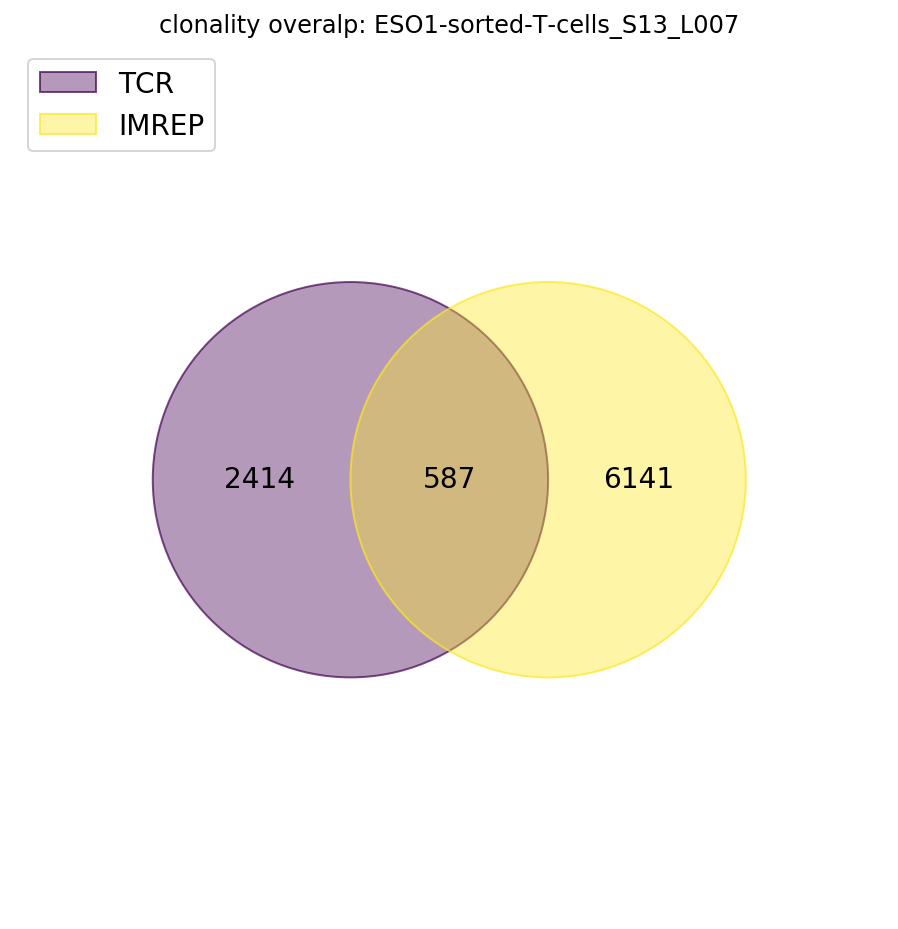

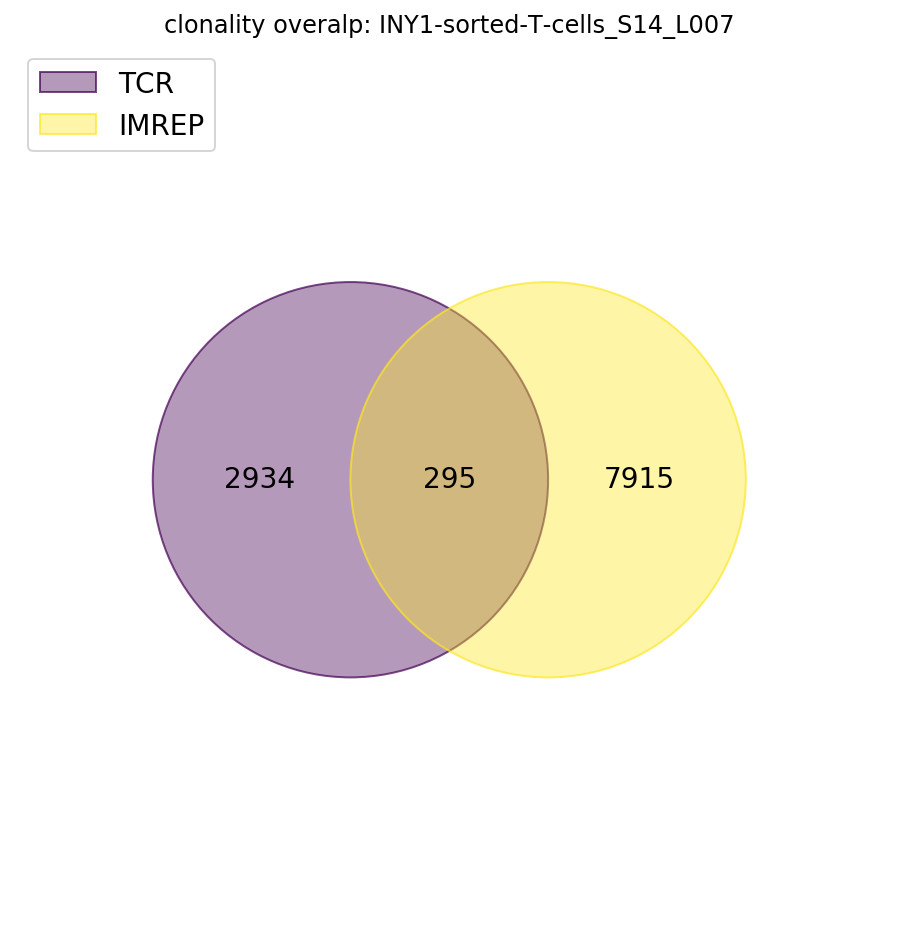

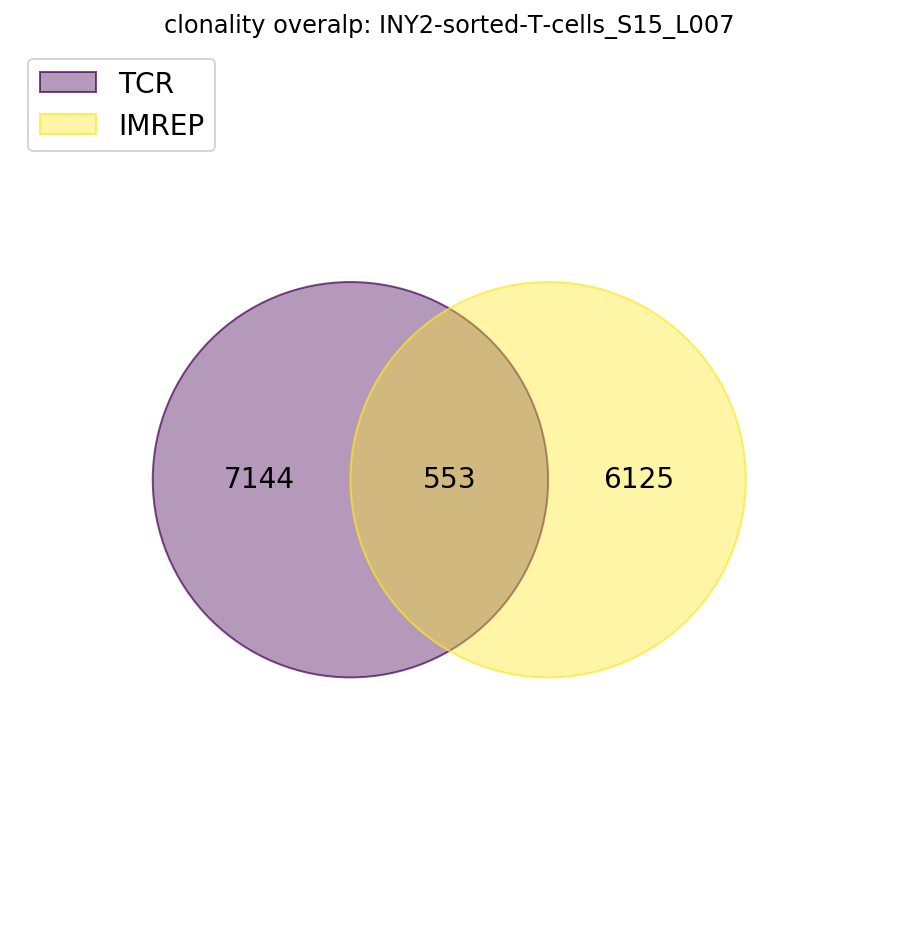

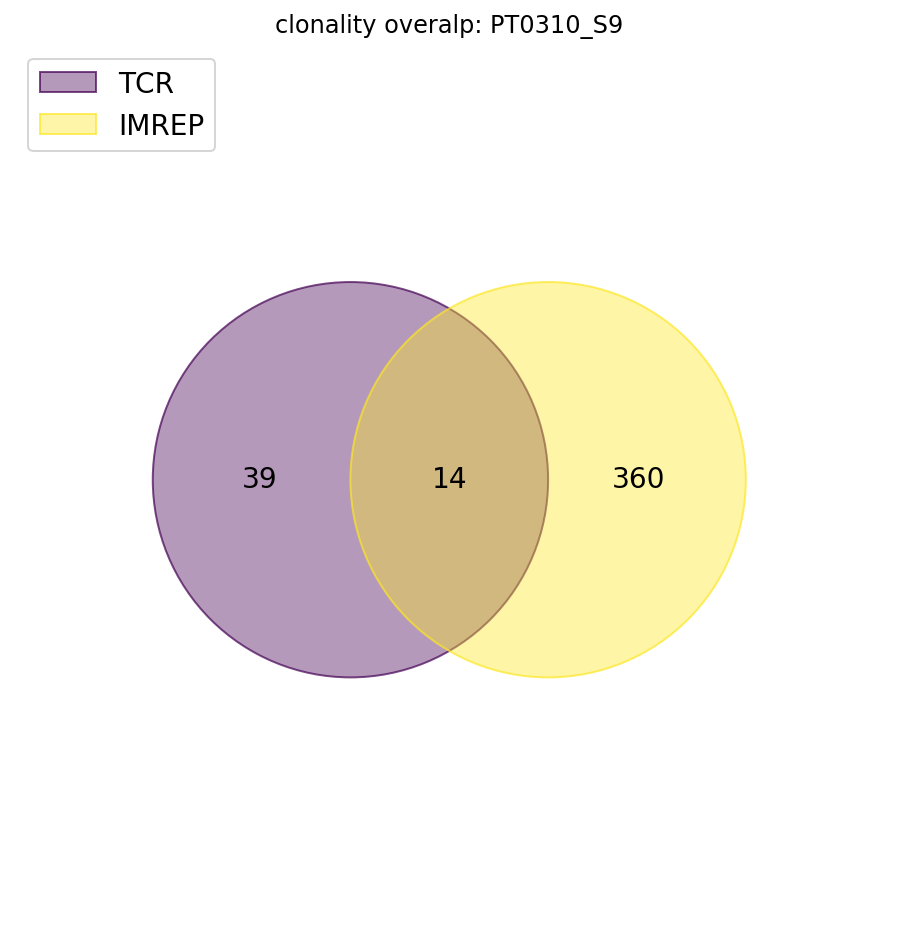

In [40]:
import ast
for sample in monoclonal_sample:
    df = clonetype_overlap_df.loc[(clonetype_overlap_df['Sample'] == sample)]
    tools = {
        "TCR": set(ast.literal_eval(df['unique_clonotypes_TCR_set'].tolist()[0])),
        "IMREP": set(ast.literal_eval(df['unique_clonotypes_IMREP_set'].tolist()[0])),
        #"MIXCR": set(ast.literal_eval(df['unique_clonotypes_MIXCR_set'].tolist()[0])),
        #"TRUST4": set(ast.literal_eval(df['unique_clonotypes_TRUST4_set'].tolist()[0]))
    }
    ax = venn(tools,figsize=(8, 8), fontsize=14, legend_loc="upper left")
    ax.set(title = "clonality overalp: "+sample)

### Polyclonal samples

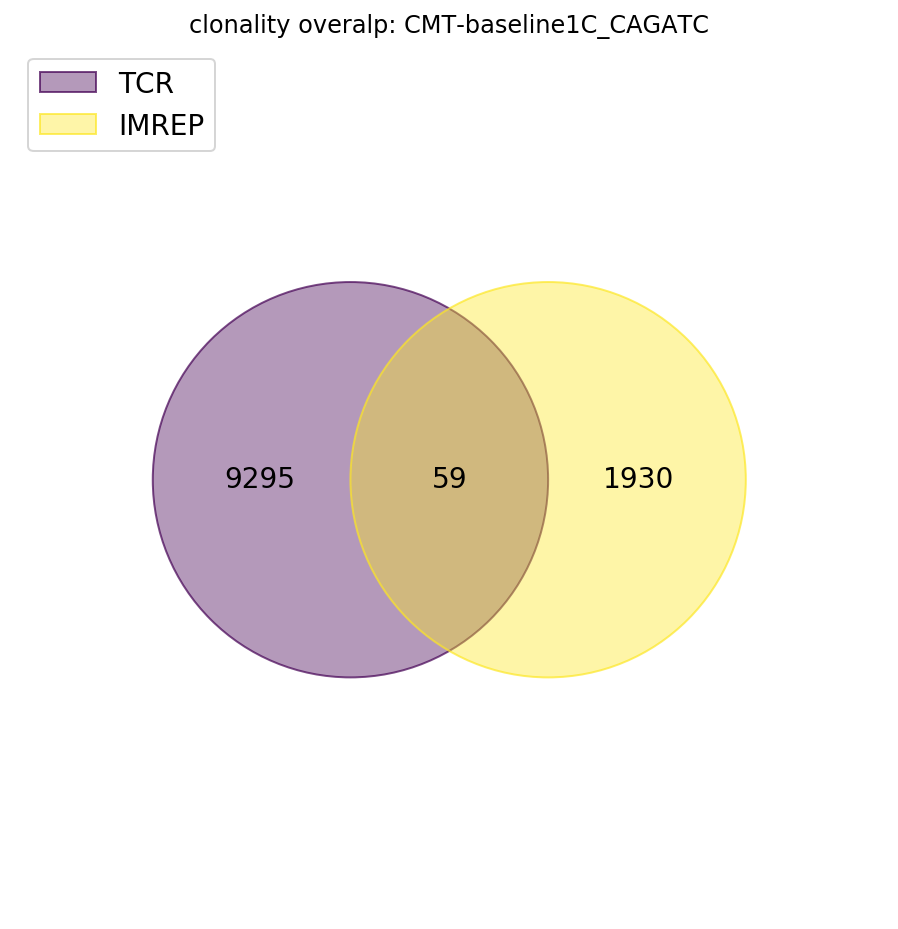

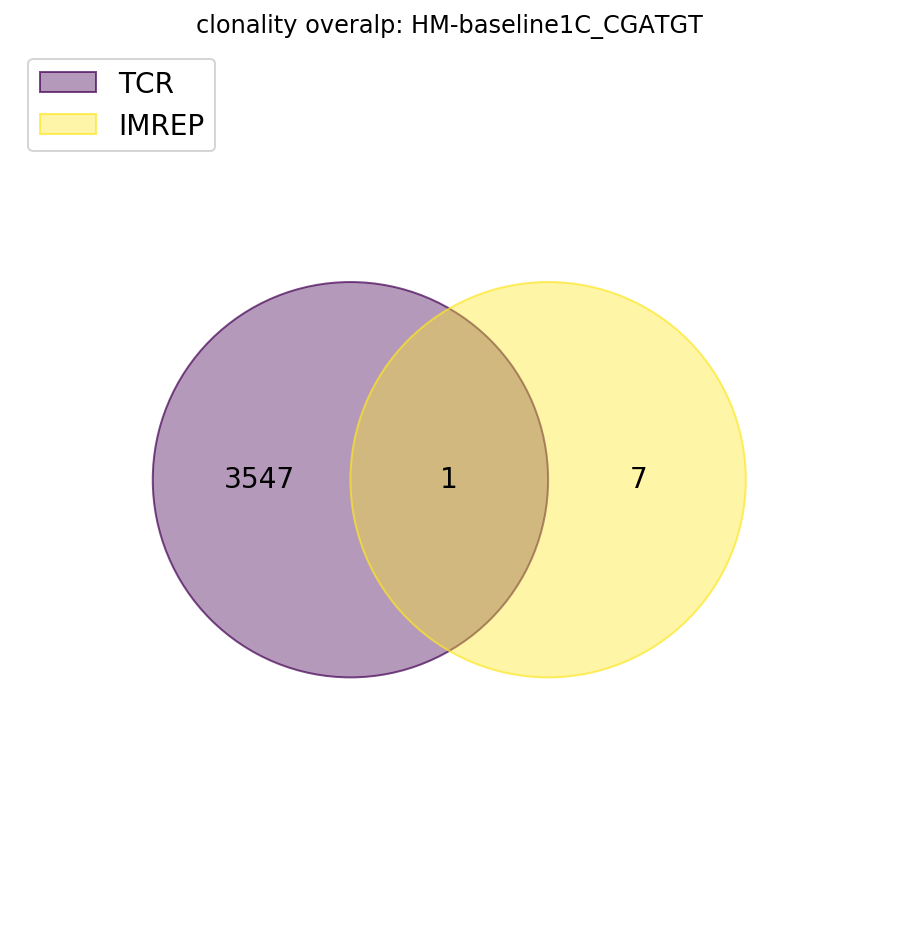

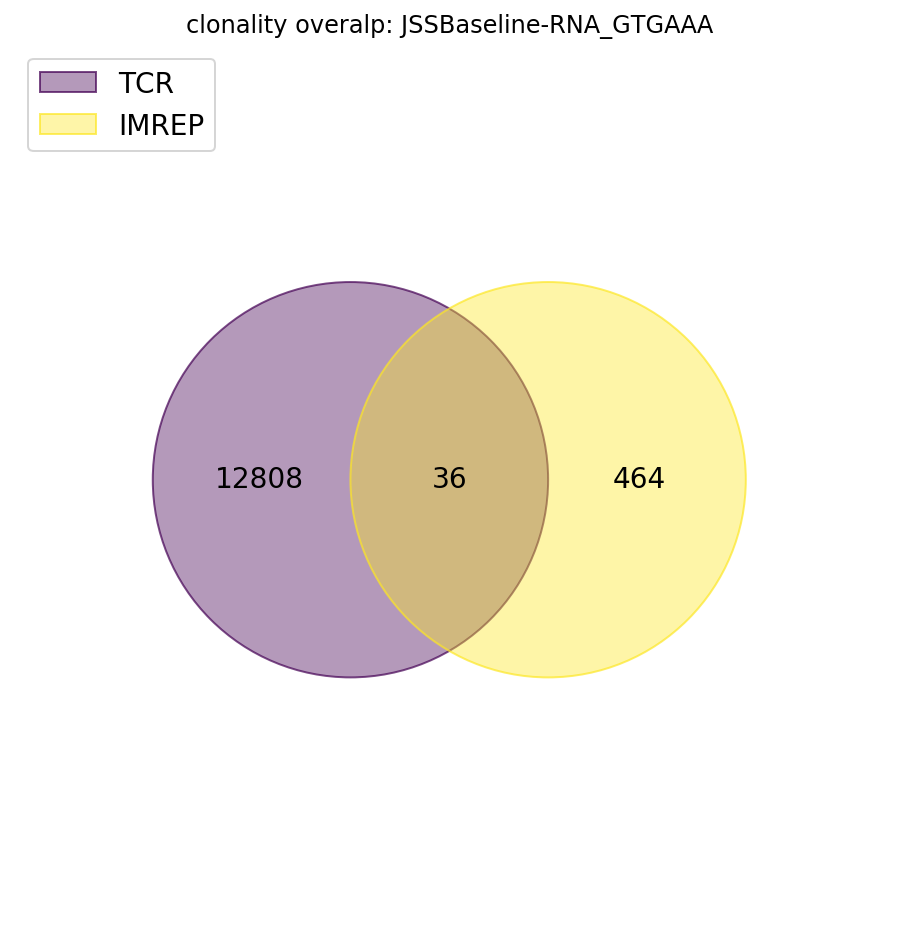

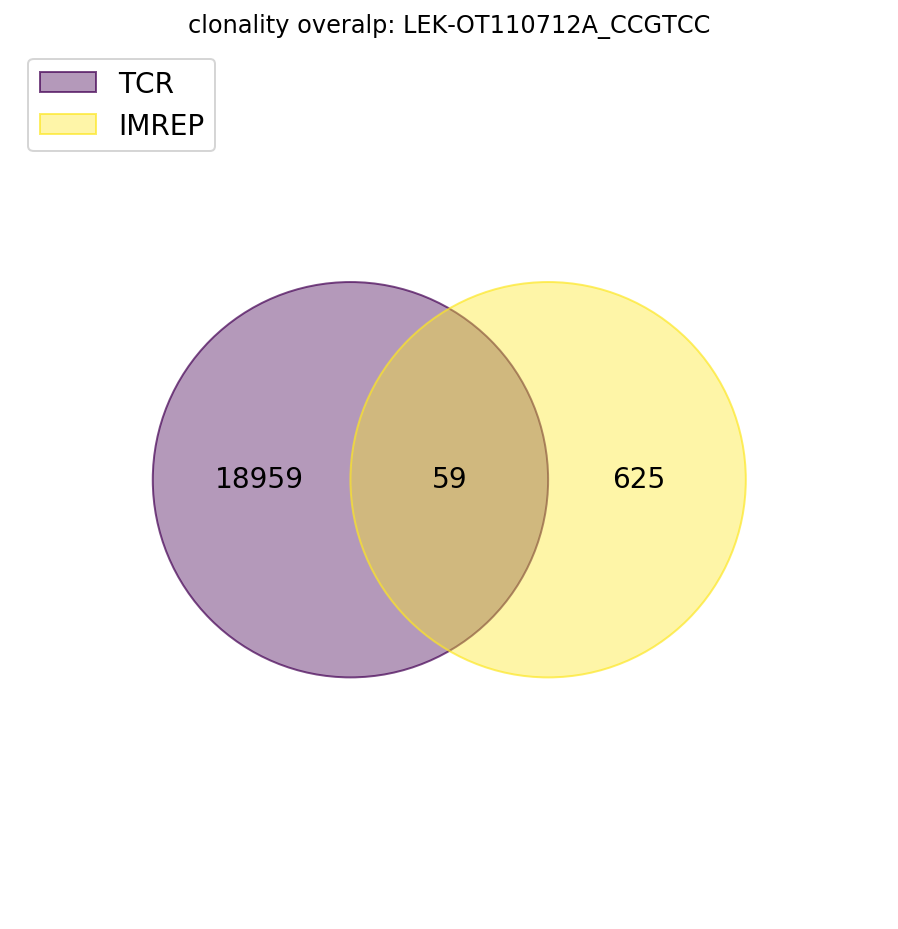

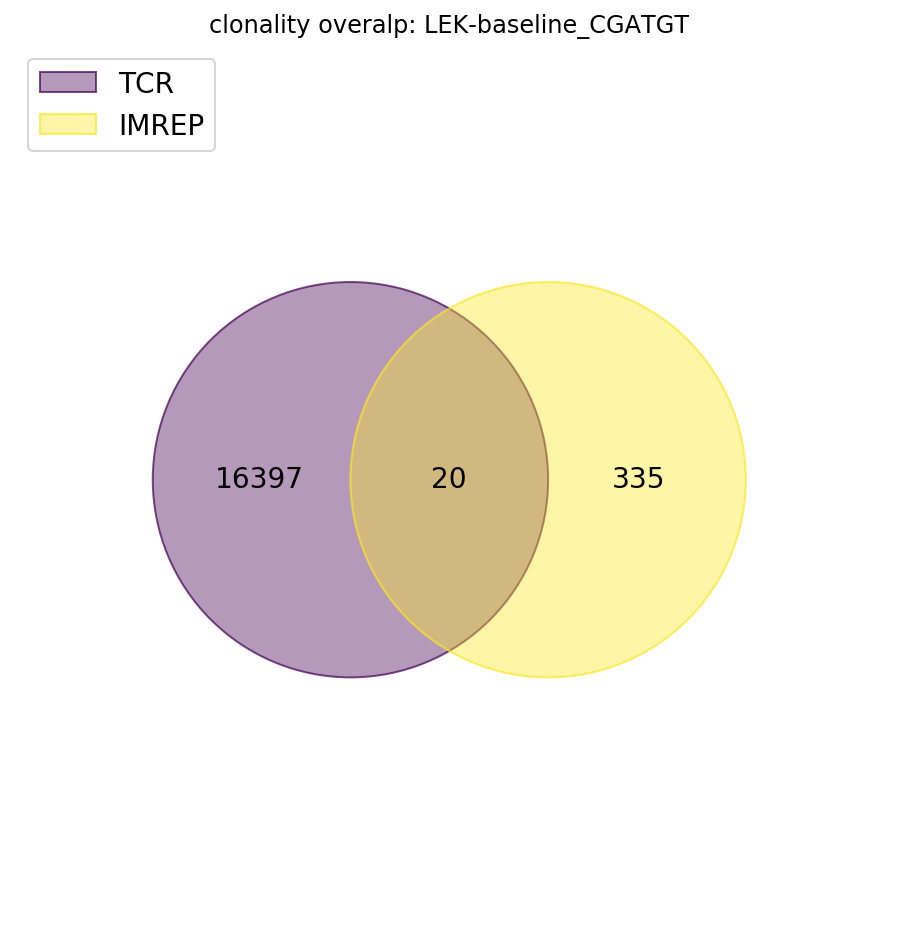

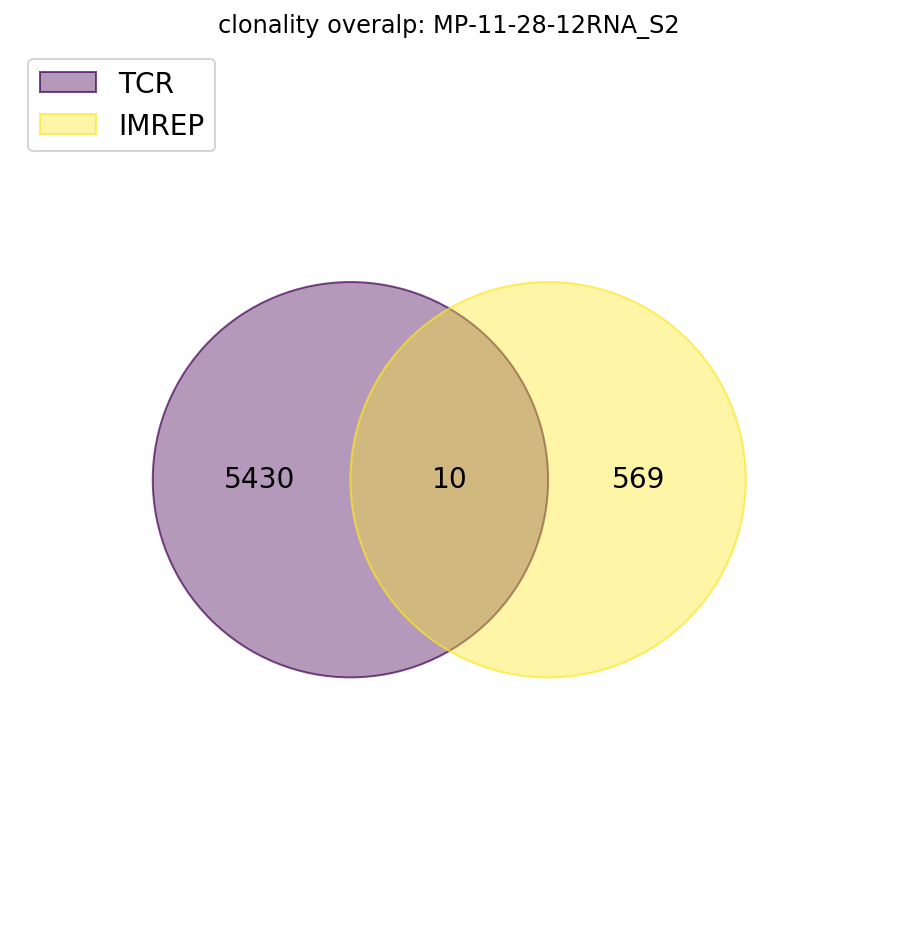

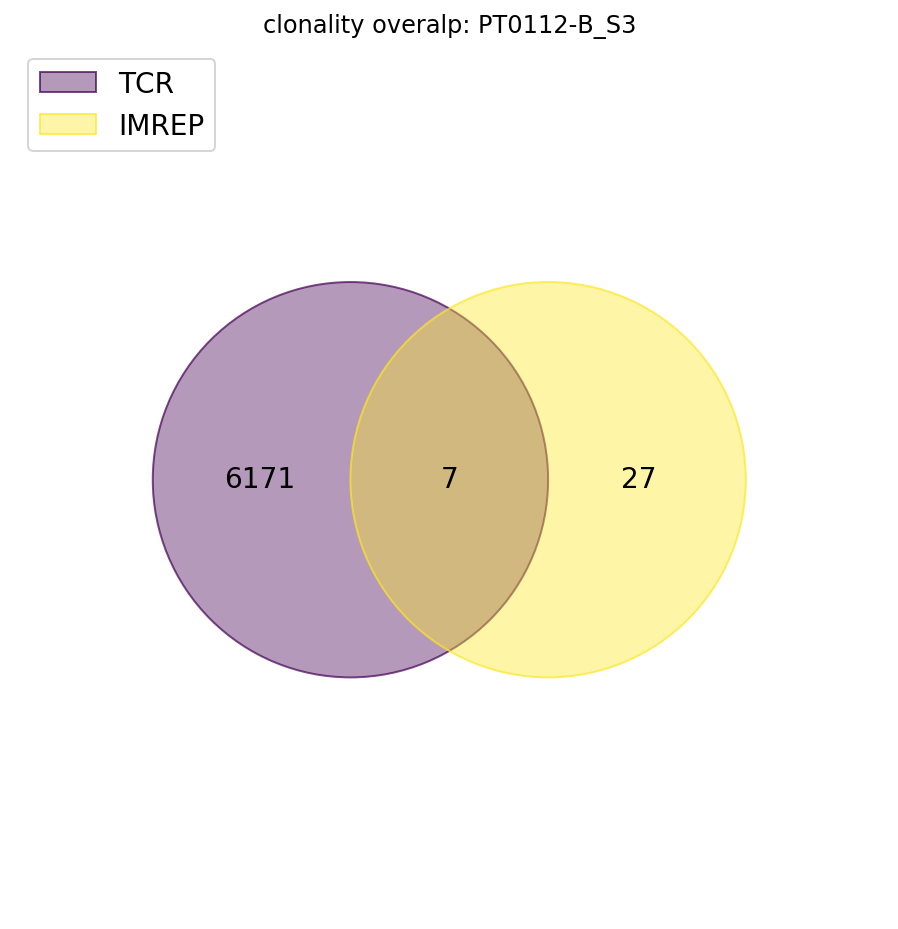

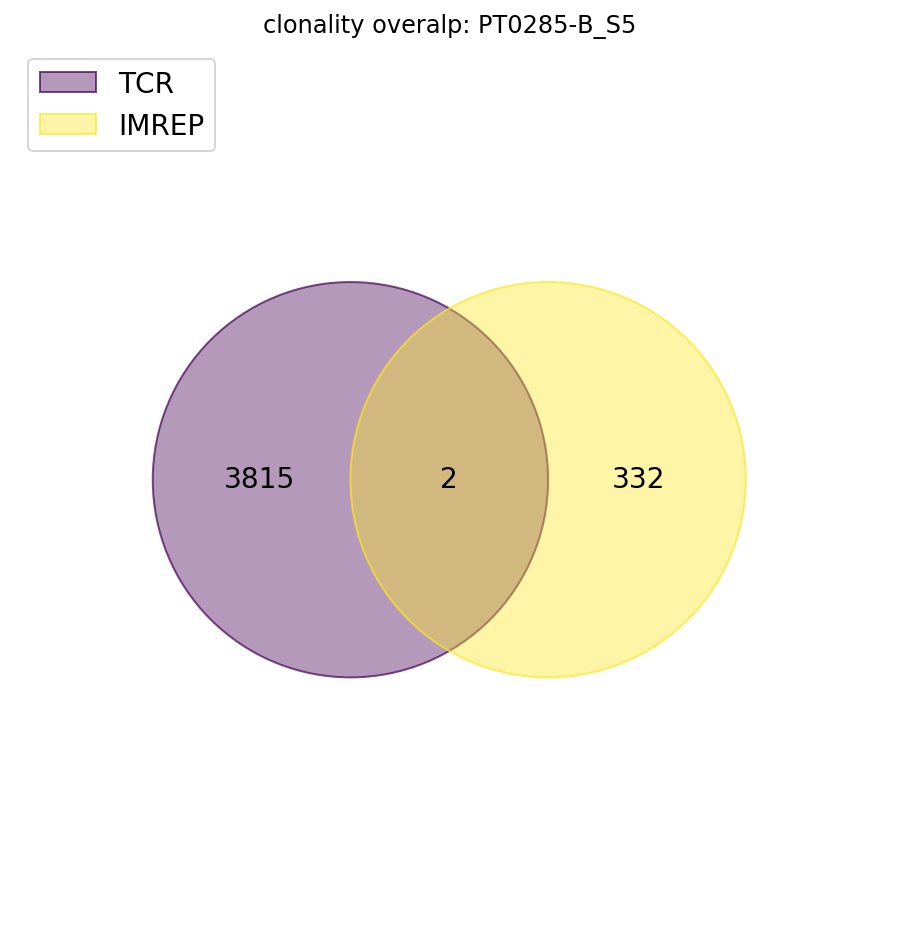

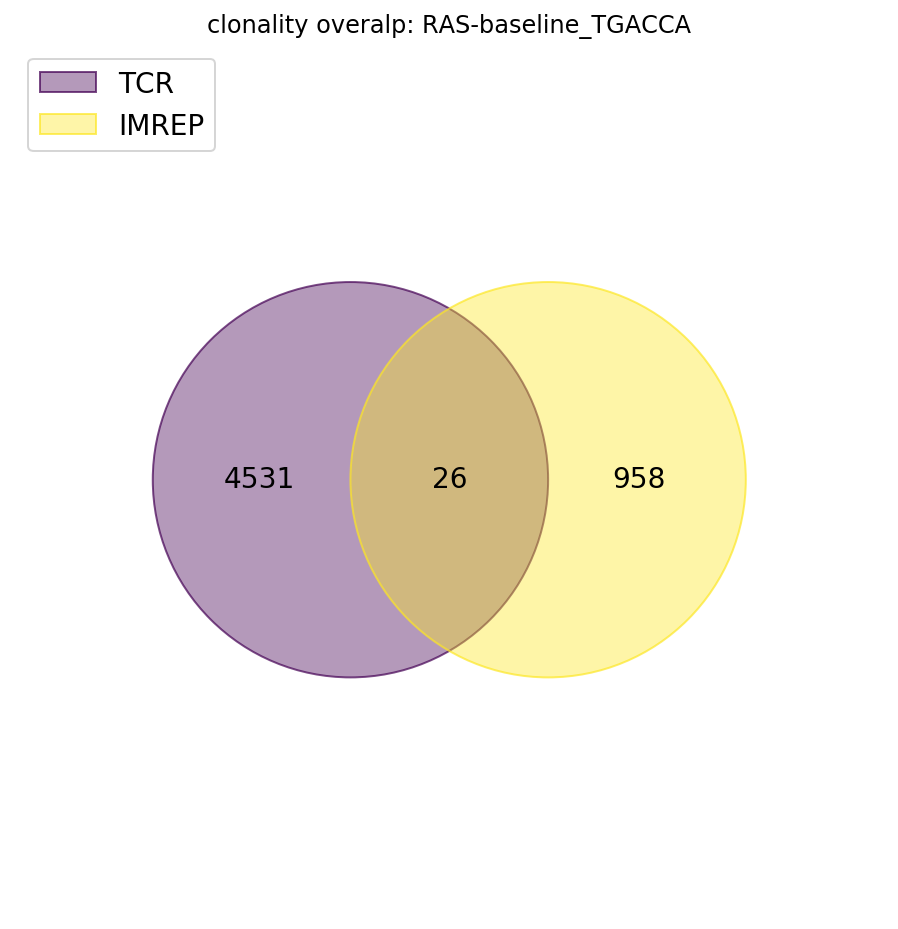

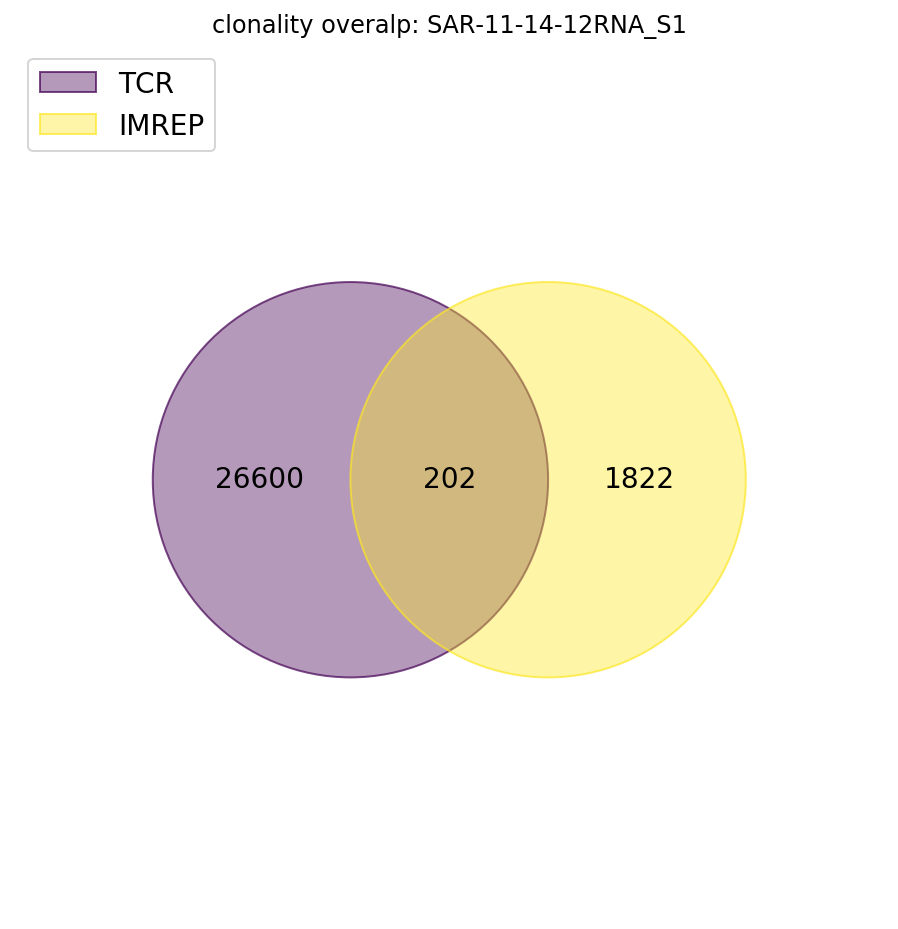

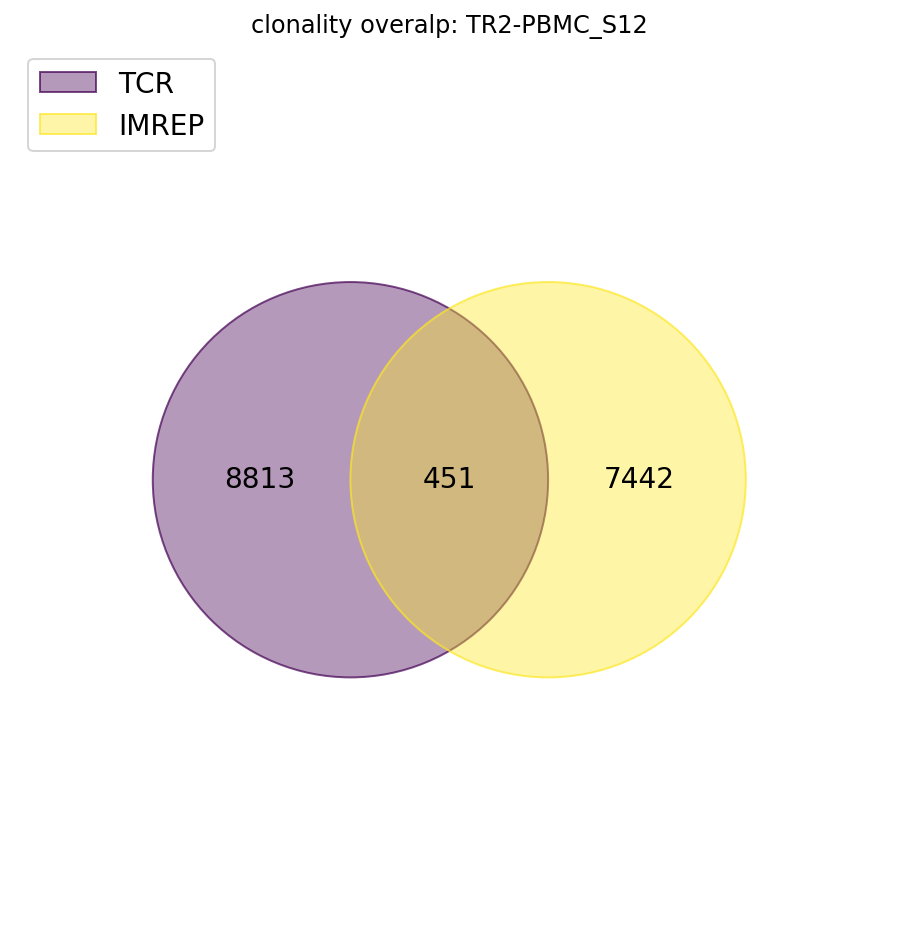

In [41]:
for sample in polyclonal_sample:
    df = clonetype_overlap_df.loc[(clonetype_overlap_df['Sample'] == sample)]
    tools = {
        "TCR": set(ast.literal_eval(df['unique_clonotypes_TCR_set'].tolist()[0])),
        "IMREP": set(ast.literal_eval(df['unique_clonotypes_IMREP_set'].tolist()[0])),
        #"MIXCR": set(ast.literal_eval(df['unique_clonotypes_MIXCR_set'].tolist()[0])),
        #"TRUST4": set(ast.literal_eval(df['unique_clonotypes_TRUST4_set'].tolist()[0]))
    }
    ax = venn(tools,figsize=(8, 8), fontsize=14, legend_loc="upper left")
    ax.set(title = "clonality overalp: "+sample)

## Venn diagram of overlapping clones (subsampled data)

In [76]:
sub_clonetype_overlap_df = pd.DataFrame({"Sample": sample_names, "unique_clonetypes_TCR": [0] * 15,
                                        "unique_clonetypes_IMREP": [0] * 15, "overlap_TCR_IMREP": [0] *15,
                                        "unique_clonetypes_TCR_set": [""] * 15, "overlap_TCR_IMREP_set": [""] * 15,
                                        "overlap_TCR_IMREP_dict_frequencies": [""] * 15})

sub_merge_IMREP_TCR = pd.merge(sub_IMREP_df, sub_TCR_df, how='outer', on=['Sample', 'CDR3']).fillna(0)

In [77]:
df = sub_merge_IMREP_TCR
for sample in sample_names:
    total_unique_clonotypes_TCR = len(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique())    
    sub_clonetype_overlap_df.loc[sub_clonetype_overlap_df["Sample"] == sample, 'unique_clonetypes_TCR'] = total_unique_clonotypes_TCR
    
    total_unique_clonotypes_IMREP = len(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique())    
    sub_clonetype_overlap_df.loc[sub_clonetype_overlap_df["Sample"] == sample, 'unique_clonetypes_IMREP'] = total_unique_clonotypes_IMREP

In [78]:
for sample in sample_names:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
    
    sub_clonetype_overlap_df.loc[sub_clonetype_overlap_df["Sample"] == sample, 'unique_clonetypes_TCR_set'] = str(list(total_unique_clonotypes_TCR))
    sub_clonetype_overlap_df.loc[sub_clonetype_overlap_df["Sample"] == sample, 'unique_clonetypes_IMREP_set'] = str(list(total_unique_clonotypes_IMREP))

In [79]:
# Get overlapping clonotypes for each sample per: tool, number, and unique set
for sample in sample_names:
    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
    
    overlap_TCR_IMREP = list(total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP))
    
    #Set of overlapping clonotypes per sample per tool
    sub_clonetype_overlap_df.loc[sub_clonetype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_set'] = str(set(overlap_TCR_IMREP))
    
    #Number of overlapping clonotypes per sample per tool
    sub_clonetype_overlap_df.loc[sub_clonetype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP'] = len(overlap_TCR_IMREP)
    

In [80]:
#Frequency dictionary of overlapping clonotypes per sample per tool, format: [TCR_freq, Tool_freq]
for sample in sample_names:    
    #TCR    
    total_unique_clonotypes_TCR = set(df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)]['CDR3'].unique().tolist())
    TCR_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_TCR'] >1)][['CDR3', 'Frequency_TCR']]
    TCR_Freq_dict = dict(zip(TCR_Freq_df.CDR3, TCR_Freq_df.Frequency_TCR))
 
    
    #IMREP
    total_unique_clonotypes_IMREP = set(df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)]['CDR3'].unique().tolist())
    IMREP_Freq_df = df.loc[(df['Sample'] == sample) & (df['nReads_IMREP'] >1)][['CDR3', 'Frequency_IMREP']]
    IMREP_Freq_dict = dict(zip(IMREP_Freq_df.CDR3, IMREP_Freq_df.Frequency_IMREP))
    
    #####################    
    #   TCR_IMREP
    overlap_TCR_IMREP_set_cdr3 = total_unique_clonotypes_TCR.intersection(total_unique_clonotypes_IMREP)
    overlap_TCR_IMREP_dict = dict.fromkeys(overlap_TCR_IMREP_set_cdr3, [])    
    
    for cdr3 in overlap_TCR_IMREP_set_cdr3:
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(TCR_Freq_dict[cdr3])]
        overlap_TCR_IMREP_dict[cdr3] = overlap_TCR_IMREP_dict[cdr3] + [(IMREP_Freq_dict[cdr3])]

    #     print(overlap_TCR_IMREP_dict)
    sub_clonetype_overlap_df.loc[sub_clonetype_overlap_df["Sample"] == sample, 'overlap_TCR_IMREP_dict_frequencies'] = str(overlap_TCR_IMREP_dict)

### Monoclonal samples

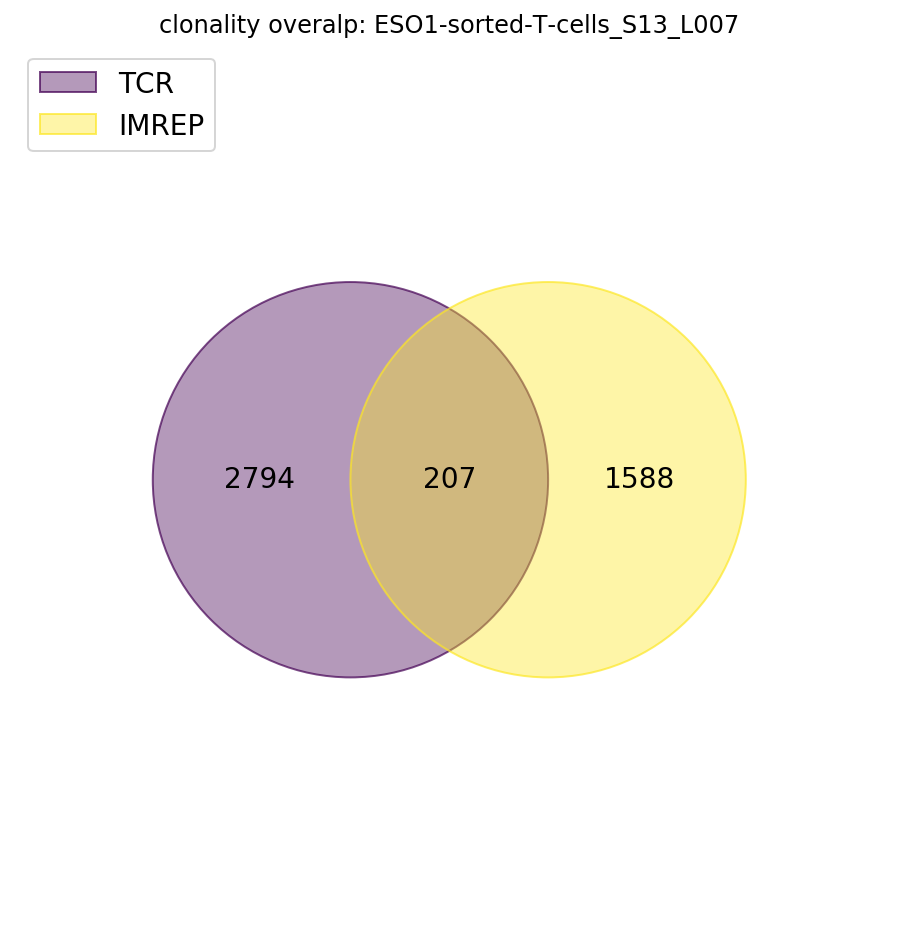

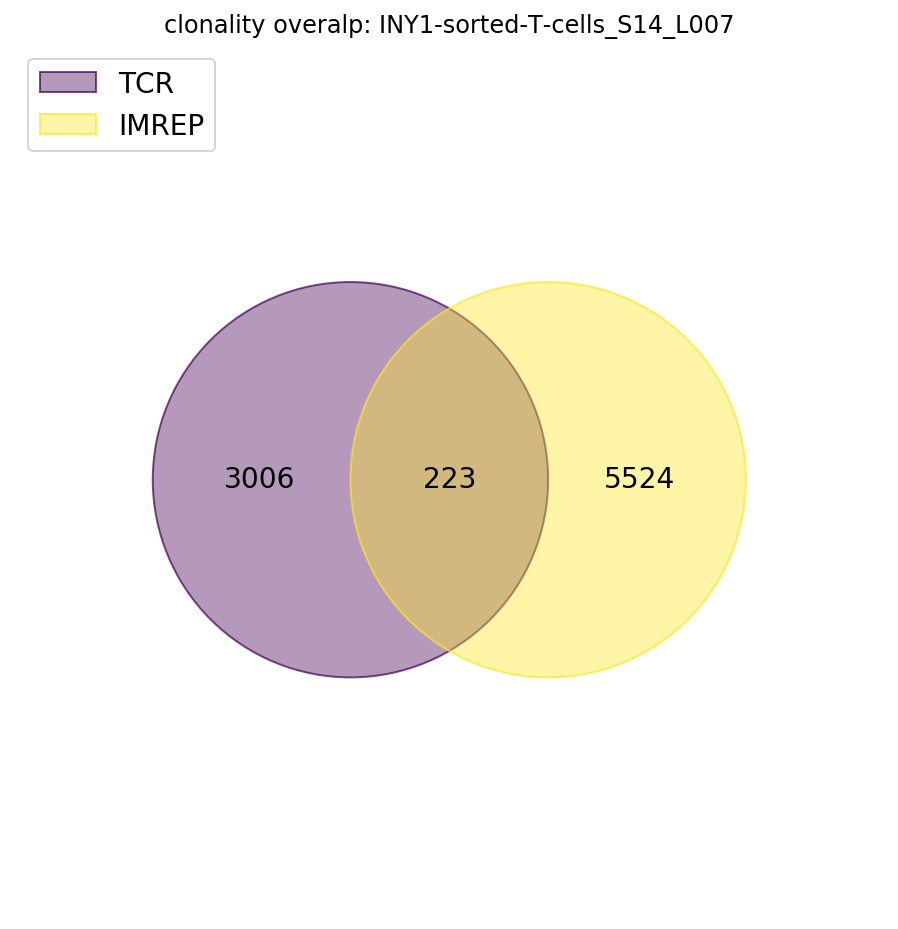

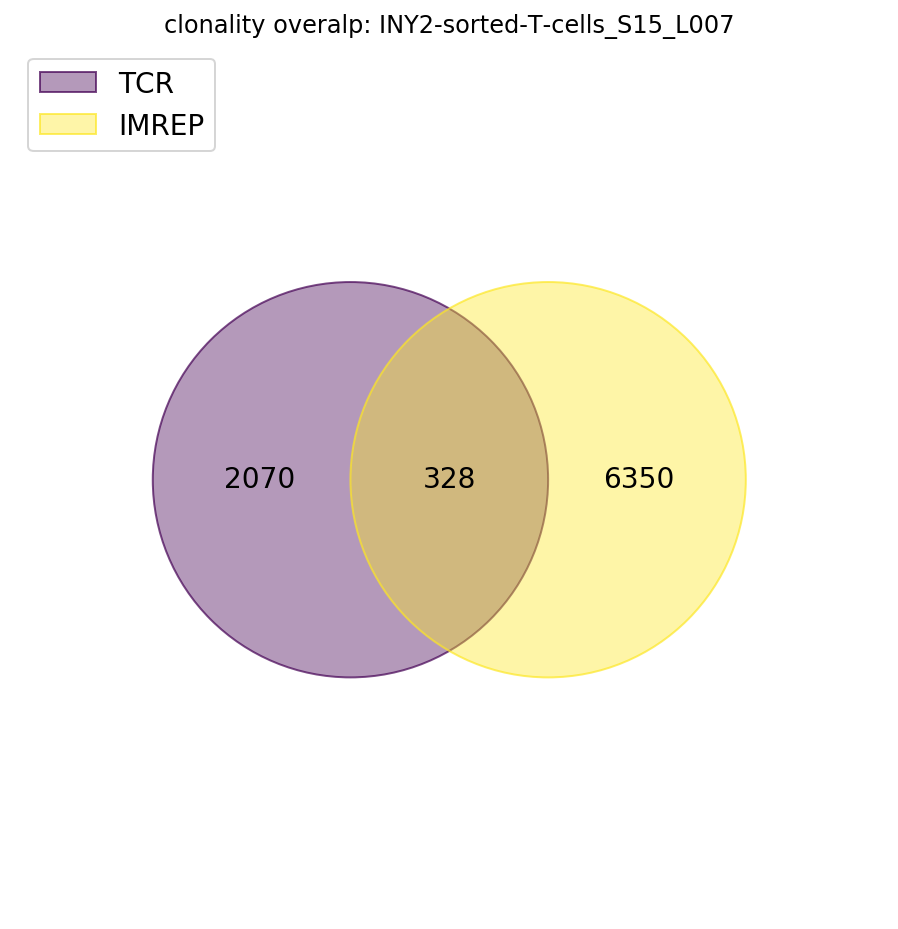

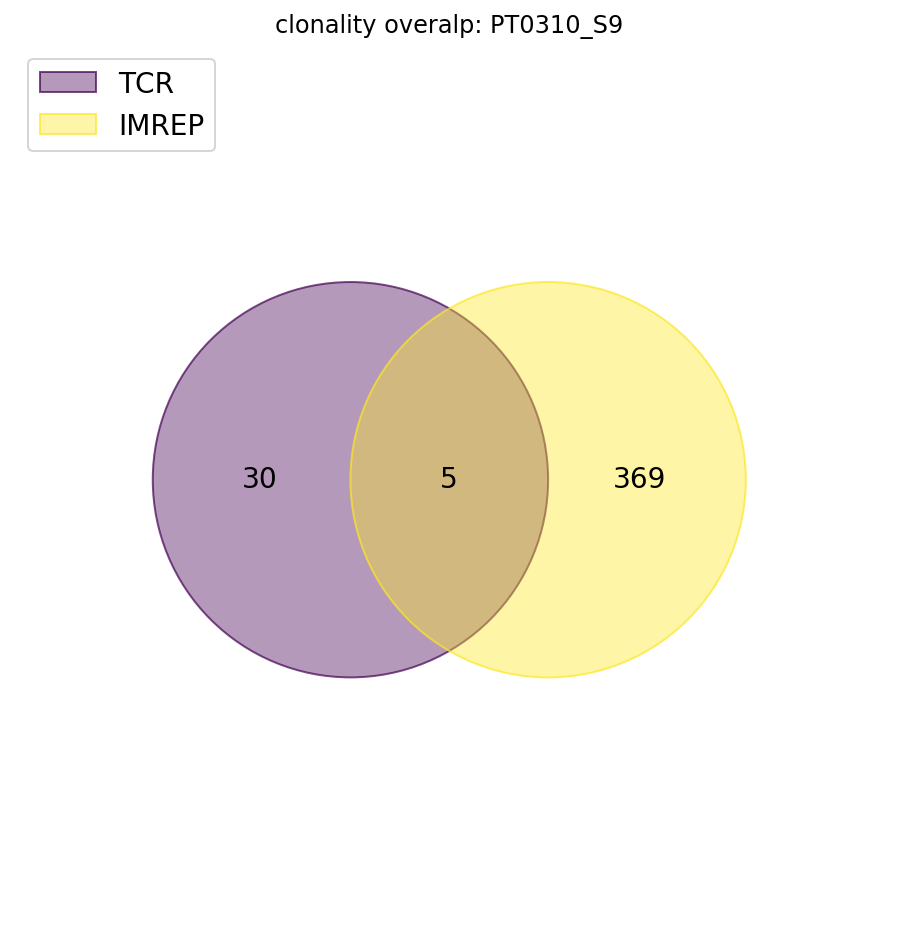

In [82]:
for sample in monoclonal_sample:
    df = sub_clonetype_overlap_df.loc[(sub_clonetype_overlap_df['Sample'] == sample)]
    tools = {
        "TCR": set(ast.literal_eval(df['unique_clonetypes_TCR_set'].tolist()[0])),
        "IMREP": set(ast.literal_eval(df['unique_clonetypes_IMREP_set'].tolist()[0])),
        #"MIXCR": set(ast.literal_eval(df['unique_clonotypes_MIXCR_set'].tolist()[0])),
        #"TRUST4": set(ast.literal_eval(df['unique_clonotypes_TRUST4_set'].tolist()[0]))
    }
    ax = venn(tools,figsize=(8, 8), fontsize=14, legend_loc="upper left")
    ax.set(title = "clonality overalp: " + sample)

### Polyclonal samples

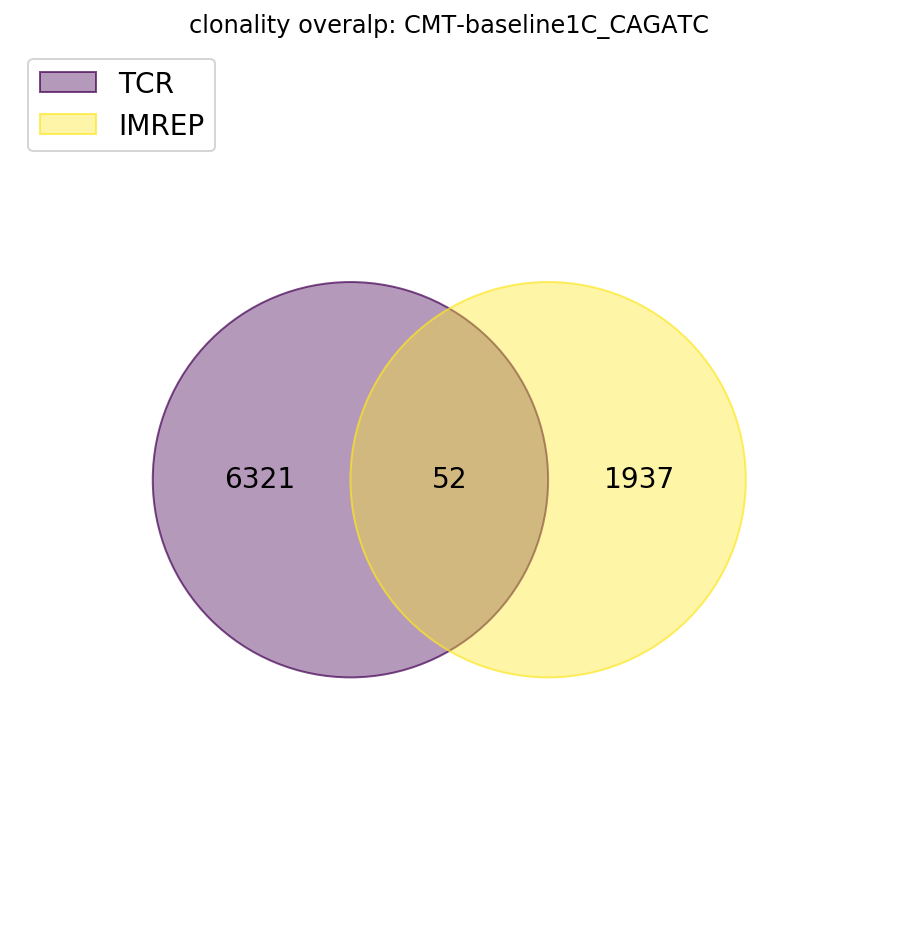

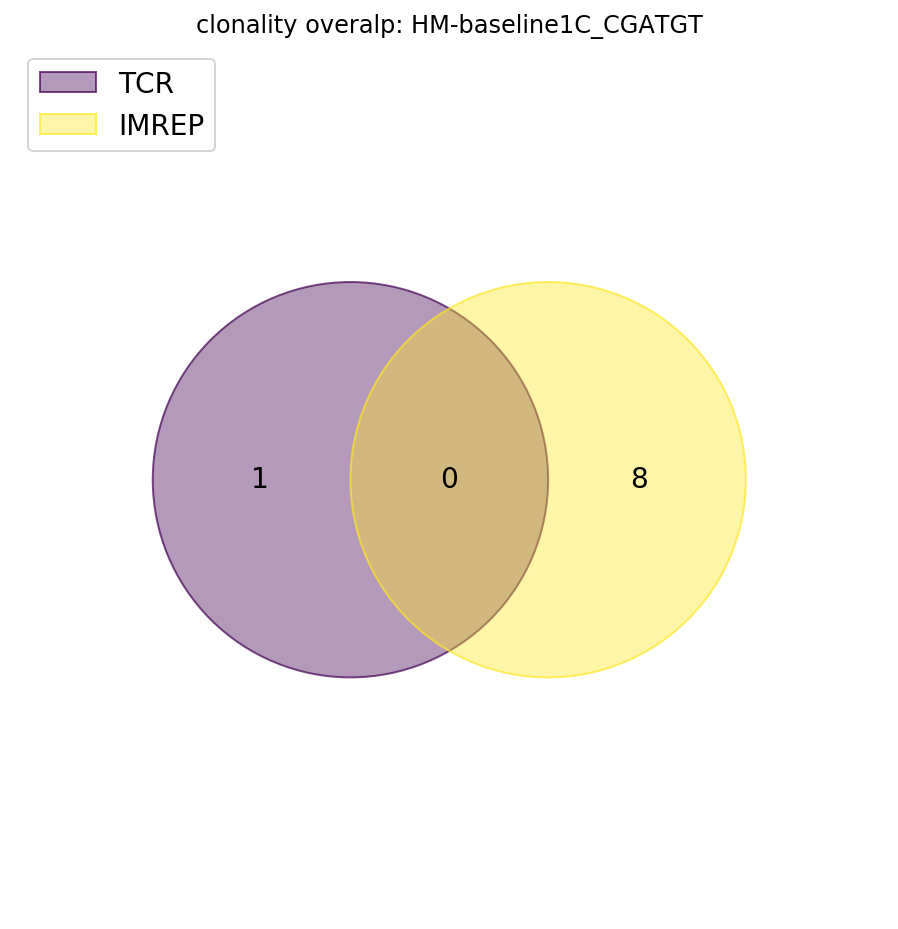

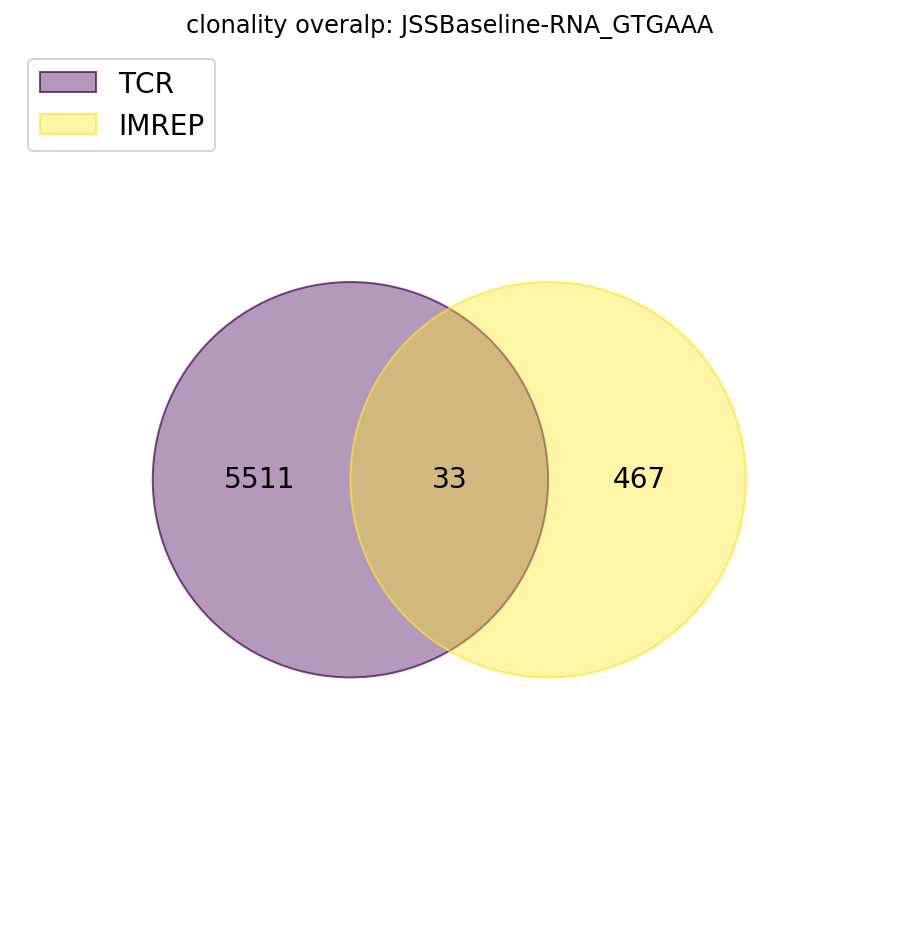

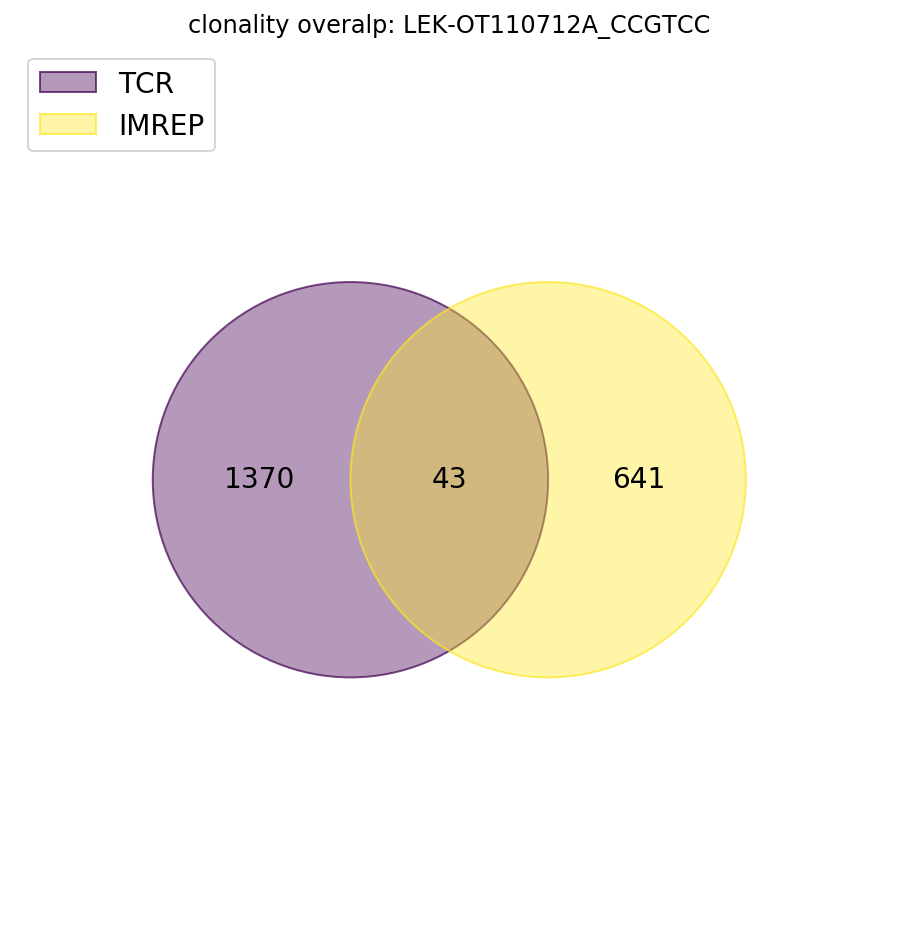

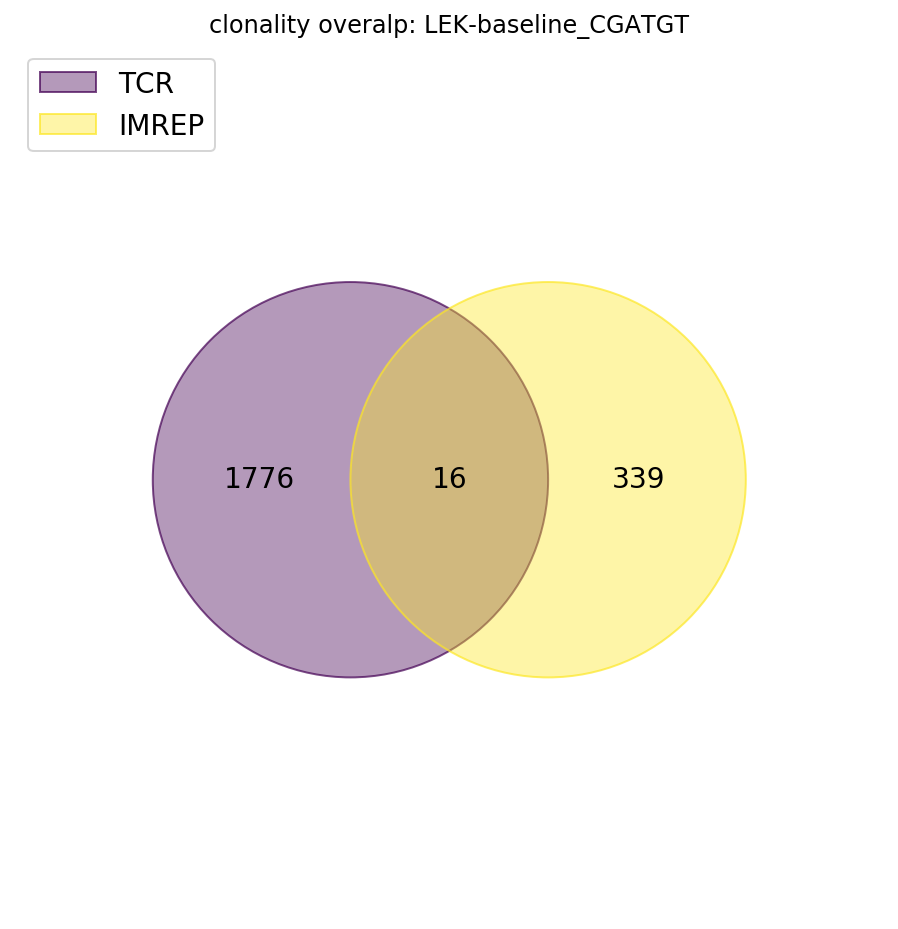

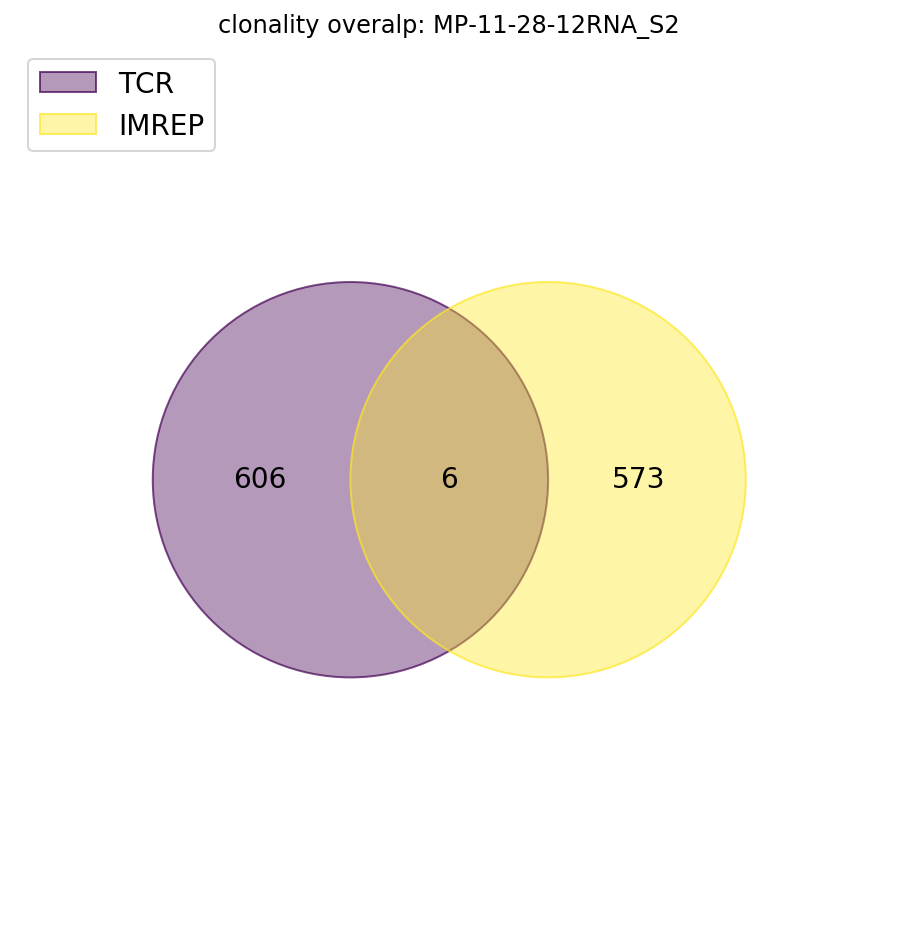

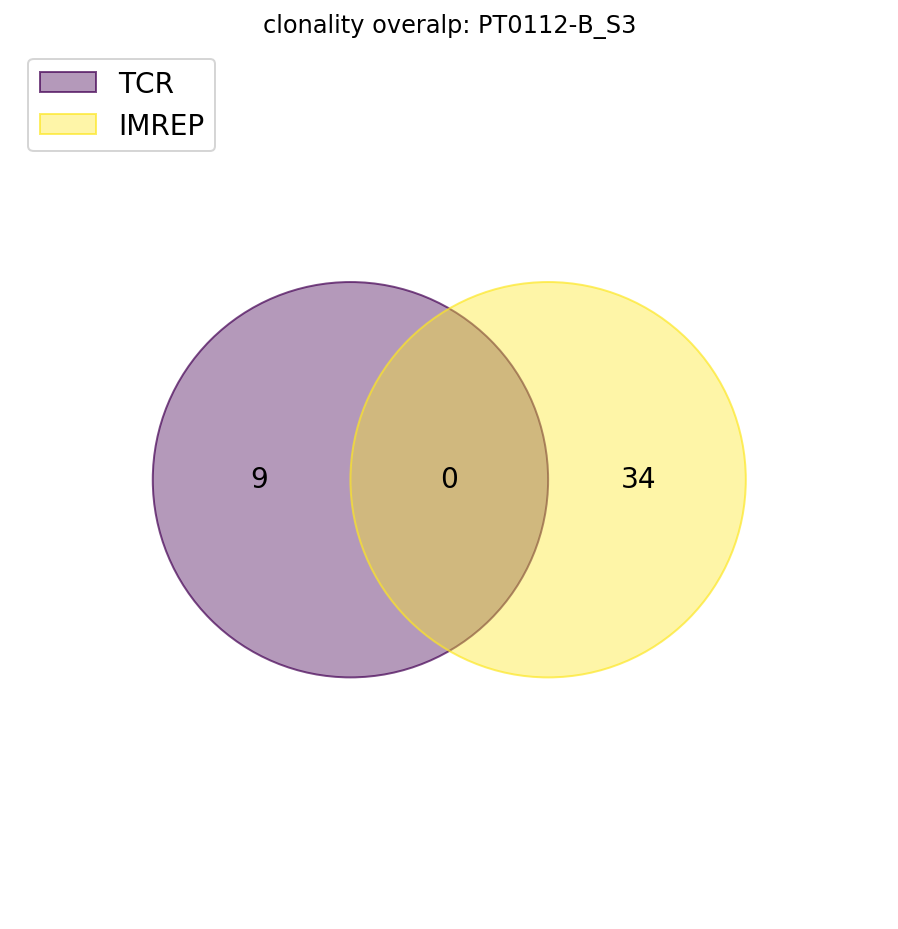

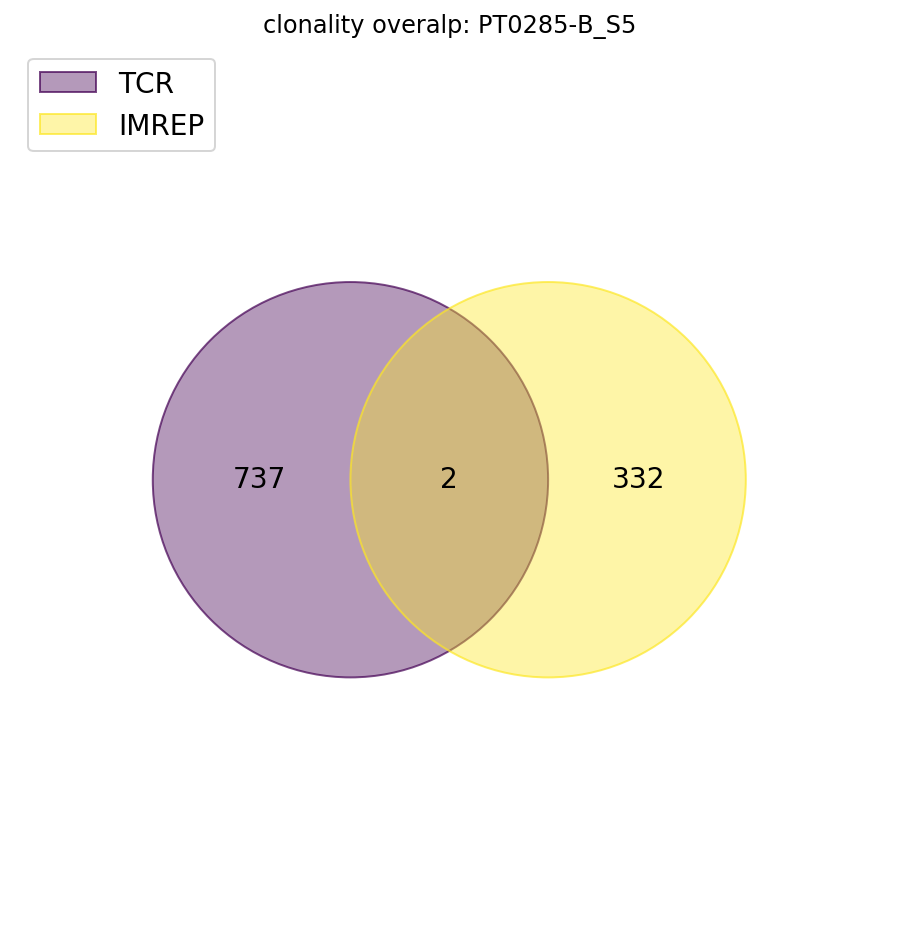

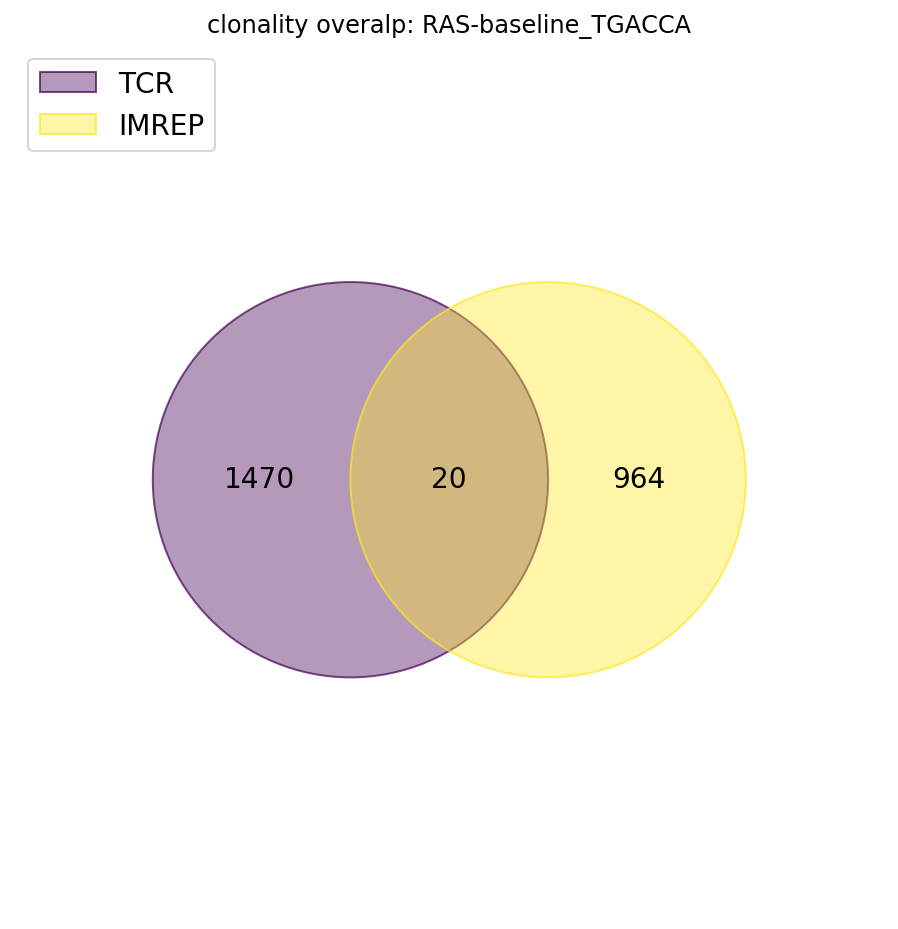

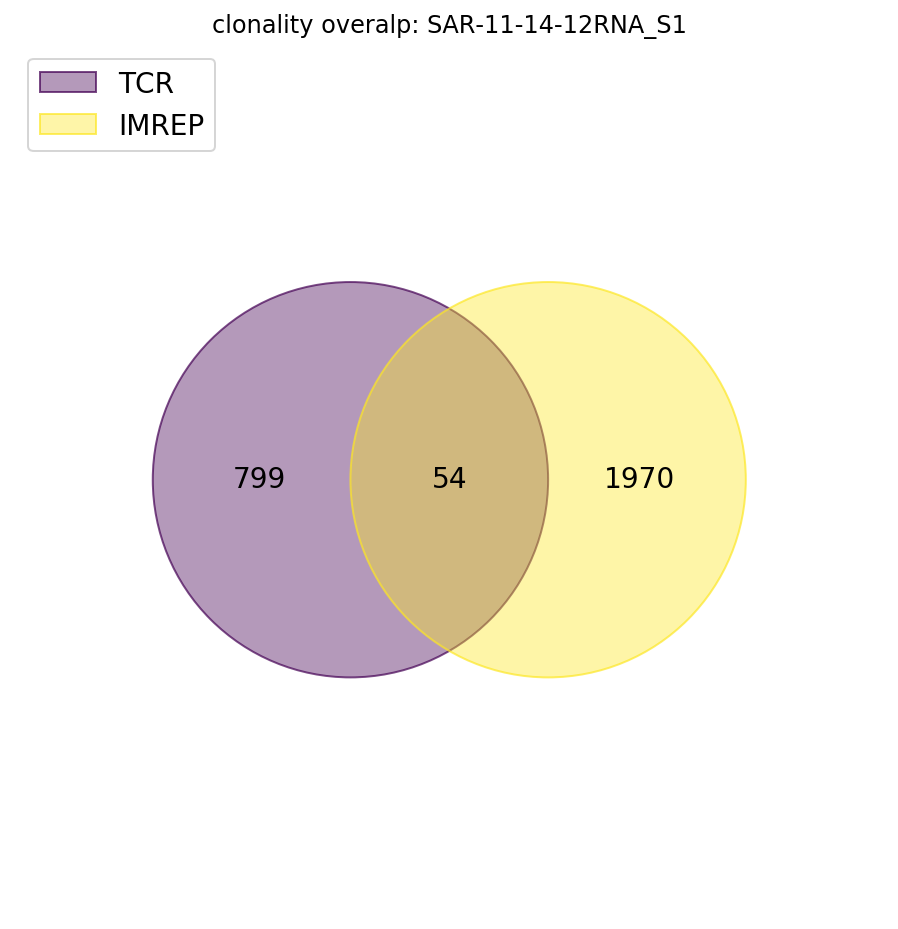

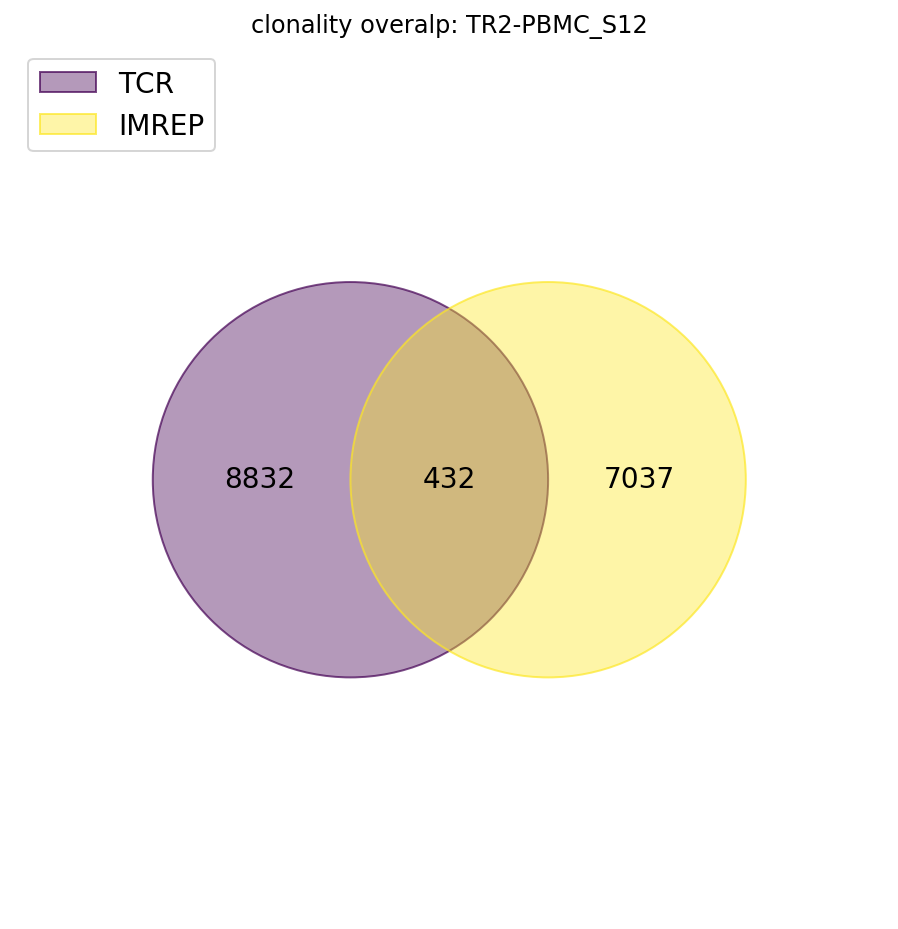

In [83]:
for sample in polyclonal_sample:
    df = sub_clonetype_overlap_df.loc[(sub_clonetype_overlap_df['Sample'] == sample)]
    tools = {
        "TCR": set(ast.literal_eval(df['unique_clonetypes_TCR_set'].tolist()[0])),
        "IMREP": set(ast.literal_eval(df['unique_clonetypes_IMREP_set'].tolist()[0])),
        #"MIXCR": set(ast.literal_eval(df['unique_clonotypes_MIXCR_set'].tolist()[0])),
        #"TRUST4": set(ast.literal_eval(df['unique_clonotypes_TRUST4_set'].tolist()[0]))
    }
    ax = venn(tools,figsize=(8, 8), fontsize=14, legend_loc="upper left")
    ax.set(title = "clonality overalp: "+sample)